Fonte: https://terrabrasilis.dpi.inpe.br/queimadas/portal/pages/secao_downloads/dados-abertos/#da-focos

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

import sys
from pathlib import Path

notebook_dir = Path().resolve()
project_root = notebook_dir.parent
sys.path.insert(0, str(project_root))

import locale
try:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil')
except:
    pass

## Carregamento e exploração inicial dos dados

In [2]:
df = pl.read_parquet('../data/raw/queimadas_2015-2024.parquet')

print(f'\nDimensões: {df.height:,} linhas x {df.width} colunas')
print(f'Uso de memória: {df.estimated_size('mb'):.2f} MB')


Dimensões: 40,442,317 linhas x 13 colunas
Uso de memória: 4218.41 MB


In [3]:
df.head()

latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
str,str,str,str,str,str,str,str,str,f64,f64,str,str
""" -11.561960""",""" -55.093250""","""2015-06-08 05:41:00""","""NPP-375D""","""Brasil""","""MATO GROSSO""","""CLÁUDIA""","""Amazônia""","""16""",0.0,0.5,"""0""",null
""" -9.522970""",""" -55.172350""","""2015-06-08 05:40:00""","""NPP-375D""","""Brasil""","""MATO GROSSO""","""NOVO MUNDO""","""Amazônia""","""9""",0.0,0.7,"""0""",null
""" -20.762530""",""" -46.769690""","""2015-06-08 04:03:00""","""NPP-375D""","""Brasil""","""MINAS GERAIS""","""ITAÚ DE MINAS""","""Mata Atlântica""","""5""",0.0,-999.0,"""0""",null
""" -5.355910""",""" -45.107430""","""2015-06-08 03:58:00""","""NPP-375D""","""Brasil""","""MARANHÃO""","""BARRA DO CORDA""","""Cerrado""","""2""",1.1,1.0,"""0""",null
""" -15.837070""",""" -45.672990""","""2015-06-08 04:01:00""","""NPP-375D""","""Brasil""","""MINAS GERAIS""","""URUCUIA""","""Cerrado""","""25""",0.0,1.0,"""0""",null


In [4]:
df.schema

Schema([('latitude', String),
        ('longitude', String),
        ('data_pas', String),
        ('satelite', String),
        ('pais', String),
        ('estado', String),
        ('municipio', String),
        ('bioma', String),
        ('numero_dias_sem_chuva', String),
        ('precipitacao', Float64),
        ('risco_fogo', Float64),
        ('id_area_industrial', String),
        ('frp', String)])

In [5]:
df.describe()

statistic,latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
str,str,str,str,str,str,str,str,str,str,f64,f64,str,str
"""count""","""40442317""","""40442317""","""40442317""","""40442317""","""40442317""","""40442317""","""40442317""","""40442190""","""40190765""",4.0190765e7,4.0190765e7,"""40442317""","""25468846"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""127""","""251552""",251552.0,251552.0,"""0""","""14973471"""
"""mean""",null,null,null,null,null,null,null,null,null,0.730647,-10.289476,null,null
"""std""",null,null,null,null,null,null,null,null,null,3.477508,104.61418,null,null
"""min""",""" .000000 """,""" -34.795780 ""","""2015-01-01 01:43:00""","""AQUA_M""","""Brasil""","""ACRE""","""ABADIA DE GOIÁS""","""Amazônia""",""" -999 """,0.0,-999.0,""" 0 ""","""-0.1"""
"""25%""",null,null,null,null,null,null,null,null,null,0.0,0.6,null,null
"""50%""",null,null,null,null,null,null,null,null,null,0.0,1.0,null,null
"""75%""",null,null,null,null,null,null,null,null,null,0.0,1.0,null,null
"""max""",""" -33.733560""",""" -73.910000""","""2024-12-31 23:50:00""","""TERRA_M-T""","""Brasil""","""TOCANTINS""","""ÓLEO""","""Pantanal""","""99.0""",252.98,1.0,"""0""","""999.9"""


Como há uma quantidade massiva de dados, vamos filtrar apenas pelos satélites com maior quantidade de registros.

In [6]:
df['satelite'].value_counts().sort(by='count', descending=True)

satelite,count
str,u32
"""NPP-375""",9729649
"""GOES-16""",8713202
"""NOAA-20""",8676477
"""NPP-375D""",4523439
"""AQUA_M-T""",2017251
…,…
"""NOAA-19D""",108738
"""NOAA-15""",80991
"""NOAA-15D""",4836


In [7]:
df = df.filter(
    pl.col('satelite').is_in(['NOAA-20', 'NPP-375', 'GOES-16'])
)

In [8]:
df.null_count()

latitude,longitude,data_pas,satelite,pais,estado,municipio,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,id_area_industrial,frp
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,72,210745,210745,210745,0,10463043


Vamos remover colunas que não serão úteis para a análise: país, pois todos os dados são do Brasil; município, porque já temos estado, latitude e longitude; e id_area_industrial, que não será utilizado nesta análise.

In [9]:
df = df.drop(['pais', 'municipio', 'id_area_industrial'])
df.schema

Schema([('latitude', String),
        ('longitude', String),
        ('data_pas', String),
        ('satelite', String),
        ('estado', String),
        ('bioma', String),
        ('numero_dias_sem_chuva', String),
        ('precipitacao', Float64),
        ('risco_fogo', Float64),
        ('frp', String)])

Agora vamos converter os tipos de dados para tipos mais apropriados, uma vez que o dataset está bem inconsistente nesse sentido.

In [10]:
df = df.with_columns([
    pl.col('latitude').str.strip_chars().cast(pl.Float64),
    pl.col('longitude').str.strip_chars().cast(pl.Float64),
    pl.col('data_pas').str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S"),
    pl.col('satelite').cast(pl.Categorical),
    pl.col('estado').cast(pl.Categorical),
    pl.col('bioma').cast(pl.Categorical),
    pl.col('numero_dias_sem_chuva').str.strip_chars().cast(pl.Float64).cast(pl.Int64),
    pl.col('frp').str.strip_chars().cast(pl.Float64),
])
df.head()

latitude,longitude,data_pas,satelite,estado,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,frp
f64,f64,datetime[μs],cat,cat,cat,i64,f64,f64,f64
4.10405,-61.15007,2015-01-06 17:51:00,"""NPP-375""","""RORAIMA""","""Amazônia""",20,0.1,0.7,null
-4.28432,-44.83284,2015-01-08 17:11:00,"""NPP-375""","""MARANHÃO""","""Amazônia""",3,0.2,1.0,null
-3.22881,-42.34033,2015-01-08 17:11:00,"""NPP-375""","""MARANHÃO""","""Cerrado""",6,0.0,0.9,null
2.92878,-60.08455,2015-01-06 17:51:00,"""NPP-375""","""RORAIMA""","""Amazônia""",11,0.0,1.0,null
-6.85993,-47.04064,2015-01-09 16:51:00,"""NPP-375""","""MARANHÃO""","""Cerrado""",3,0.0,0.6,null


In [11]:
df.describe()

statistic,latitude,longitude,data_pas,satelite,estado,bioma,numero_dias_sem_chuva,precipitacao,risco_fogo,frp
str,f64,f64,str,str,str,str,f64,f64,f64,f64
"""count""",2.7119328e7,2.7119328e7,"""27119328""","""27119328""","""27119328""","""27119256""",2.6908583e7,2.6908583e7,2.6908583e7,1.6656285e7
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""72""",210745.0,210745.0,210745.0,1.0463043e7
"""mean""",-10.069584,-52.271509,"""2021-06-21 15:44:06.799674""",null,null,null,13.965033,0.719467,-9.743359,36.739027
"""std""",5.814581,7.428253,null,null,null,null,102.540147,3.424135,101.948588,63.722356
"""min""",-33.74551,-73.86338,"""2015-01-01 15:58:00""",null,null,null,-999.0,0.0,-999.0,-3.8
"""25%""",-13.2332,-57.34447,"""2019-09-28 17:18:46""",null,null,null,3.0,0.0,0.54,4.7
"""50%""",-9.28874,-51.6632,"""2021-09-14 15:54:00""",null,null,null,8.0,0.0,1.0,10.2
"""75%""",-6.32604,-46.34,"""2023-09-15 15:15:38""",null,null,null,28.0,0.0,1.0,53.3
"""max""",5.21761,-34.79578,"""2024-12-31 23:50:00""",null,null,null,836.0,252.98,1.0,8014.3


## Tratamento de valores inválidos e duplicatas
- Podemos observar que o número de dias sem chuva e o risco de fogo possuem valores -999, que indicam dados inválidos ou ausentes. Vamos substituir esses valores por nulos.
- Além disso, o FRP (Fire Radiative Power) possui tanto valores nulos quanto menores ou iguais a 0, então vamos remover esses registros.

In [12]:
df = df.with_columns([
    pl.when(pl.col('numero_dias_sem_chuva') == -999)
      .then(None)
      .otherwise(pl.col('numero_dias_sem_chuva'))
      .alias('numero_dias_sem_chuva'),

    pl.when(pl.col('risco_fogo') == -999)
      .then(None)
      .otherwise(pl.col('risco_fogo'))
      .alias('risco_fogo'),
])

df = df.drop_nulls(subset=['frp'])

df = df.filter(pl.col('frp') > 0)
print(f'Dimensões após remoção de valores inválidos: {df.height:,} linhas x {df.width} colunas')

Dimensões após remoção de valores inválidos: 16,652,766 linhas x 10 colunas


In [13]:
duplicates_count = df.is_duplicated().sum()
print(f'Número de registros duplicados: {duplicates_count}')

# Mantém o registro com maior potência radiativa de fogo
df = df.sort(by='frp', descending=True).unique(keep='first')
print(f'Dimensões após remoção de duplicatas: {df.height:,} linhas x {df.width} colunas')

Número de registros duplicados: 770
Dimensões após remoção de duplicatas: 16,652,381 linhas x 10 colunas


### Feature Engineering e agrupamento de registros por dia

**Insight**: Podemos observar que o número de registros para 2015 e 2016 caiu para 0 após o tratamento dos dados. 2017, por sua vez, ficou com apenas 190 exemplos, o que nos permite removê-los sem comprometer a análise.

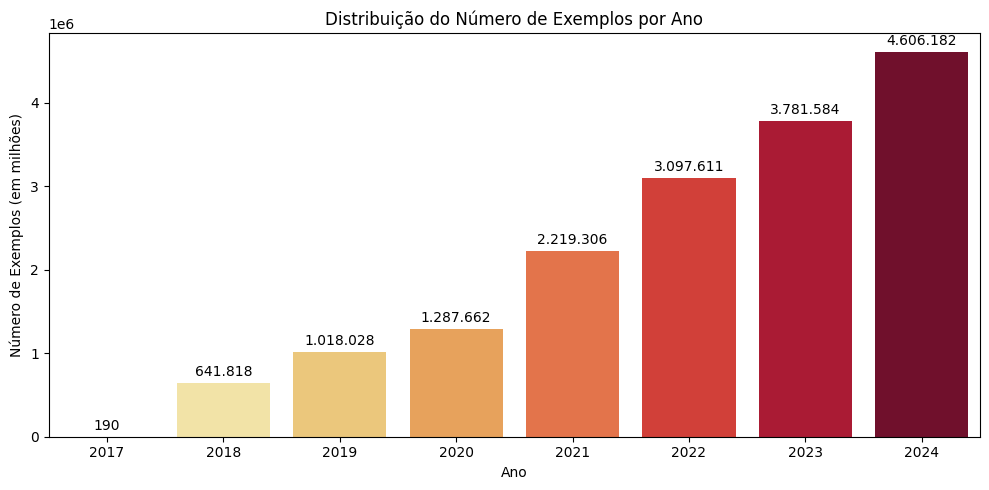

In [14]:
df = df.with_columns([
    pl.col('data_pas').dt.year().alias('ano')
])

records_per_year = (
    df
    .group_by('ano')
    .agg(pl.len().alias('registros'))
    .sort('ano')
)

fig = plt.figure(figsize=(10, 5))
ax = sns.barplot(
    records_per_year, x='ano', y='registros', hue='ano',
    legend=False, palette='YlOrRd'
)

for container in ax.containers:
    labels = [f'{x:,.0f}'.replace(',', '.') for x in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)

plt.title('Distribuição do Número de Exemplos por Ano')
plt.ylabel('Número de Exemplos (em milhões)')
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

In [15]:
df = df.filter(pl.col('ano') >= 2018)

In [16]:
df = df.with_columns([
    pl.col('data_pas').dt.hour().cast(pl.Int8).alias('hora'),
    pl.col('data_pas').dt.weekday().cast(pl.Int8).alias('dia_semana'),
    pl.col('data_pas').dt.ordinal_day().cast(pl.Int16).alias('dia_ano'),
    ((pl.col('data_pas').dt.ordinal_day() - 1) // 7 + 1).cast(pl.Int8).alias('semana_ano'),
    pl.col('data_pas').dt.month().cast(pl.Int8).alias('mes'),
    pl.col('data_pas').dt.quarter().cast(pl.Int8).alias('trimestre'),
])

# Definição do período do dia
df = df.with_columns([
    pl.when(pl.col('hora') < 6).then(pl.lit('Madrugada'))
      .when(pl.col('hora') < 12).then(pl.lit('Manhã'))
      .when(pl.col('hora') < 18).then(pl.lit('Tarde'))
      .otherwise(pl.lit('Noite'))
      .cast(pl.Categorical)
      .alias('periodo_dia')
])

# Definição da estação do ano (Brasil)
df = df.with_columns([
    pl.when(pl.col('mes').is_in([12, 1, 2])).then(pl.lit('Verão'))
      .when(pl.col('mes').is_in([3, 4, 5])).then(pl.lit('Outono'))
      .when(pl.col('mes').is_in([6, 7, 8])).then(pl.lit('Inverno'))
      .otherwise(pl.lit('Primavera'))
      .cast(pl.Categorical)
      .alias('estacao_ano')
])

# Definição do período climático com base no bioma e mês
df = df.with_columns([
    pl.when((pl.col('bioma') == 'Amazônia') & pl.col('mes').is_in([6, 7, 8, 9, 10, 11]))
      .then(pl.lit('Seco'))
      .when((pl.col('bioma') == 'Cerrado') & pl.col('mes').is_in([5, 6, 7, 8, 9]))
      .then(pl.lit('Seco'))
      .when((pl.col('bioma') == 'Caatinga') & pl.col('mes').is_in([6, 7, 8, 9, 10, 11, 12]))
      .then(pl.lit('Seco'))
      .otherwise(pl.lit('Chuvoso'))
      .cast(pl.Categorical)
      .alias('periodo_climatico')
])

Também sabemos da fonte que pode haver múltiplos registros de focos de queimadas em um mesmo dia e local, mas em horários diferentes. Contudo, esse nível de granularidade não é necessário para a análise que pretendemos fazer. Desse modo, vamos agrupar esses registros, a princípio, a nível de dia.

In [17]:
df = df.with_columns([
    pl.col('data_pas').dt.date().alias('data_dia')
])

GROUP_COLS = ['latitude', 'longitude', 'data_dia', 'bioma', 'estado']

# Agrega com base em critérios específicos e renomeia cada feature
df_daily = df.group_by(GROUP_COLS).agg([
    pl.col('satelite').n_unique().alias('num_deteccoes_dia'),

    pl.col('numero_dias_sem_chuva').max().alias('num_dias_sem_chuva_max'),
    pl.col('precipitacao').max().alias('precipitacao_max'),
    pl.col('risco_fogo').max().alias('risco_fogo_max'),

    pl.col('frp').max().alias('frp'),

    pl.col('ano').first().alias('ano'),
    pl.col('mes').first().alias('mes'),
    pl.col('dia_ano').first().alias('dia_ano'),
    pl.col('dia_semana').first().alias('dia_semana'),
    pl.col('semana_ano').first().alias('semana_ano'),
    pl.col('trimestre').first().alias('trimestre'),

    pl.col('periodo_dia').mode().first().alias('periodo_dia_predominante'),
    pl.col('estacao_ano').first().alias('estacao_ano'),
    pl.col('periodo_climatico').first().alias('periodo_climatico'),

    pl.col('hora').min().alias('hora_primeira_deteccao'),
    pl.col('hora').max().alias('hora_ultima_deteccao'),
])

# Converte as variáveis categóricas
CAT_VARS = [
    'mes', 'dia_ano', 'dia_semana', 'semana_ano', 'trimestre',
    'periodo_dia_predominante', 'estacao_ano', 'periodo_climatico',
    'bioma', 'estado'
]
with pl.StringCache():
    df_daily = df_daily.with_columns([
        pl.col(c).cast(pl.Utf8).cast(pl.Categorical)
        for c in CAT_VARS if c in df_daily.columns
    ])

In [18]:
print(f'\nDimensões do dataset diário: {df_daily.height:,} linhas x {df_daily.width} colunas')


Dimensões do dataset diário: 13,586,113 linhas x 21 colunas


In [19]:
df_daily['ano'].value_counts()

ano,count
i32,u32
2019,1018027
2021,2218172
2022,2473135
2018,641817
2020,1287661
2024,3337851
2023,2609450


In [20]:
df_daily.null_count()

latitude,longitude,data_dia,bioma,estado,num_deteccoes_dia,num_dias_sem_chuva_max,precipitacao_max,risco_fogo_max,frp,ano,mes,dia_ano,dia_semana,semana_ano,trimestre,periodo_dia_predominante,estacao_ano,periodo_climatico,hora_primeira_deteccao,hora_ultima_deteccao
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,20,0,0,281187,111762,266657,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_daily.is_duplicated().sum()

0

## Análise univariada

In [22]:
out = {}

CATEGORICAL_COLS = [
    'bioma', 'estado', 'mes', 'dia_ano', 'dia_semana',
    'semana_ano', 'trimestre', 'periodo_dia_predominante',
    'estacao_ano', 'periodo_climatico'
]

NUMERIC_COLS = [
    'latitude', 'longitude',
    'num_deteccoes_dia', 'num_dias_sem_chuva_max',
    'precipitacao_max', 'risco_fogo_max', 'frp',
    'hora_primeira_deteccao', 'hora_ultima_deteccao',
]

DATE_COLS = ['data_dia']

ORDINAL_TIME_COLS = ['ano']

### Features numéricas
**Insight**: No geral, as variáveis numéricas possuem distribuições diferentes entre si. As mais concentradas são `frp`, `precipitacao_max` e `num_deteccoes_dia` e, as com mais outliers, `frp`, `precipitacao_max` e `num_dias_sem_chuva_max`.

In [23]:
numerical_stats = df_daily.select(NUMERIC_COLS).describe()
out['numerical_stats'] = numerical_stats
numerical_stats

statistic,latitude,longitude,num_deteccoes_dia,num_dias_sem_chuva_max,precipitacao_max,risco_fogo_max,frp,hora_primeira_deteccao,hora_ultima_deteccao
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.3586113e7,1.3586113e7,1.3586113e7,1.3304926e7,1.3474351e7,1.3319456e7,1.3586113e7,1.3586113e7,1.3586113e7
"""null_count""",0.0,0.0,0.0,281187.0,111762.0,266657.0,0.0,0.0,0.0
"""mean""",-10.049083,-51.853394,1.000001,25.316655,0.793361,0.739655,21.05673,14.565002,14.66961
"""std""",6.019474,7.699611,0.00094,35.897431,3.671229,0.353355,46.084822,4.6985,4.676021
"""min""",-33.74551,-73.86338,1.0,0.0,0.0,0.0,0.1,0.0,0.0
"""25%""",-13.31175,-57.0997,1.0,3.0,0.0,0.5,4.0,16.0,16.0
"""50%""",-9.17613,-51.05336,1.0,9.0,0.0,1.0,7.6,16.0,16.0
"""75%""",-6.22808,-45.669,1.0,32.0,0.0,1.0,16.8,17.0,17.0
"""max""",5.21761,-34.79578,2.0,836.0,157.2,1.0,8014.3,23.0,23.0


In [24]:
def col_stats(c: str) -> pl.DataFrame:
    x = pl.col(c).drop_nulls().cast(pl.Float64)
    return df_daily.select(
        pl.lit(c).alias('variavel'),
        x.quantile(0.25).alias('q1'),
        x.median().alias('median'),
        x.quantile(0.75).alias('q3'),
    )

In [25]:
# Por razões de performance, amostrar somente uma quantidade
# limitada de outliers e pontos por variável
MAX_OUTLIERS_PER_VAR = 3000

stats = (
    pl.concat([col_stats(c) for c in NUMERIC_COLS], how='vertical')
    .with_columns([
        (pl.col('q3') - pl.col('q1')).alias('iqr'),
        (pl.col('q1') - 1.5 * (pl.col('q3') - pl.col('q1'))).alias('lowerfence'),
        (pl.col('q3') + 1.5 * (pl.col('q3') - pl.col('q1'))).alias('upperfence'),
    ])
    .select(['variavel', 'q1', 'median', 'q3', 'lowerfence', 'upperfence'])
)

s = stats.to_dict(as_series=False)

outliers_long = (
    df_daily
    .select(NUMERIC_COLS)
    .unpivot(variable_name='variavel', value_name='valor')
    .drop_nulls('valor')
    .with_columns(pl.col('valor').cast(pl.Float64))
    .join(stats.select(['variavel', 'lowerfence', 'upperfence']), on='variavel', how='inner')
    .filter((pl.col('valor') < pl.col('lowerfence')) | (pl.col('valor') > pl.col('upperfence')))
    # Pega os outliers mais distantes das cercas
    .with_columns(
        pl.when(pl.col('valor') < pl.col('lowerfence'))
          .then(pl.col('lowerfence') - pl.col('valor'))
          .otherwise(pl.col('valor') - pl.col('upperfence'))
          .alias('dist_fence')
    )
    .sort(['variavel', 'dist_fence'], descending=[False, True])
    .group_by('variavel', maintain_order=True)
    .head(MAX_OUTLIERS_PER_VAR)
    .select(['variavel', 'valor'])
)

o = outliers_long.to_dict(as_series=False)

n_rows = 3
n_cols = 3

fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=NUMERIC_COLS,
    vertical_spacing=0.15,
    horizontal_spacing=0.06
)

for idx, var in enumerate(NUMERIC_COLS):
    row = (idx // n_cols) + 1
    col = (idx % n_cols) + 1

    var_idx = s['variavel'].index(var)

    fig.add_trace(
        go.Box(
            q1=[s['q1'][var_idx]],
            median=[s['median'][var_idx]],
            q3=[s['q3'][var_idx]],
            lowerfence=[s['lowerfence'][var_idx]],
            upperfence=[s['upperfence'][var_idx]],
            boxpoints=False,
            name=var,
            showlegend=False,
            marker_color='steelblue',
            line=dict(width=1.5),
            x=[var]
        ),
        row=row, col=col
    )

    outlier_vals = [o['valor'][i] for i, v in enumerate(o['variavel']) if v == var]

    if outlier_vals:
        fig.add_trace(
            go.Scatter(
                x=[var] * len(outlier_vals),
                y=outlier_vals,
                mode='markers',
                name='Outliers (amostrados)',
                showlegend=(idx == 0),
                marker=dict(size=3, opacity=0.6, color='red')
            ),
            row=row, col=col
        )

    fig.update_xaxes(showticklabels=False, row=row, col=col)

    fig.update_yaxes(title_text='', row=row, col=col)

# Layout geral
fig.update_layout(
    title_text='Distribuição das Variáveis Numéricas',
    title_font_size=18,
    height=1050,
    width=1050,
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.08,
        xanchor="center",
        x=0.5
    )
)

fig.show()

### Features categóricas
**Insights**:
- A Amazônia é o bioma com maior número de focos de queimadas, representando 46,5% dos registros.
- Os estados do Pará (18,4%) e Mato Grosso (15,7%) são os que mais apresentam focos de queimadas.
- Os meses de agosto (21,3%) e setembro (29,5%) concentram a maioria dos registros.
- O 3º trimestre do ano (57%) é o período com mais focos de queimadas.
- A maioria dos focos de queimadas ocorre à tarde (73,4%).
- A primavera (57,7%) é a estação do ano com mais registros de queimadas.
- O período seco (73,3%) é o que apresenta a maior quantidade de focos de queimadas.

In [26]:
cat_summaries = {}
for col in CATEGORICAL_COLS:
    var_count = (
        df_daily
        .group_by(col)
        .len()
        .sort('len', descending=True)
        .rename({'len': 'count'})
    )
    var_count = var_count.with_columns((pl.col('count') / df_daily.height).alias('pct'))
    cat_summaries[col] = var_count

out['categorical_summaries'] = cat_summaries
cat_summaries

{'bioma': shape: (7, 3)
 ┌────────────────┬─────────┬──────────┐
 │ bioma          ┆ count   ┆ pct      │
 │ ---            ┆ ---     ┆ ---      │
 │ cat            ┆ u32     ┆ f64      │
 ╞════════════════╪═════════╪══════════╡
 │ Amazônia       ┆ 6329555 ┆ 0.465884 │
 │ Cerrado        ┆ 4396363 ┆ 0.323592 │
 │ Caatinga       ┆ 1182761 ┆ 0.087057 │
 │ Mata Atlântica ┆ 933904  ┆ 0.06874  │
 │ Pantanal       ┆ 690710  ┆ 0.050839 │
 │ Pampa          ┆ 52800   ┆ 0.003886 │
 │ null           ┆ 20      ┆ 0.000001 │
 └────────────────┴─────────┴──────────┘,
 'estado': shape: (27, 3)
 ┌─────────────────────┬─────────┬──────────┐
 │ estado              ┆ count   ┆ pct      │
 │ ---                 ┆ ---     ┆ ---      │
 │ cat                 ┆ u32     ┆ f64      │
 ╞═════════════════════╪═════════╪══════════╡
 │ PARÁ                ┆ 2497610 ┆ 0.183836 │
 │ MATO GROSSO         ┆ 2134562 ┆ 0.157114 │
 │ MARANHÃO            ┆ 1309348 ┆ 0.096374 │
 │ AMAZONAS            ┆ 1037793 ┆ 0.076386 │
 │

A seguir, fazemos uma análise das variáveis categóricas de tempo.

In [27]:
out['freq_by_year'] = df_daily.group_by('ano').len().sort('ano').rename({'len': 'count'})
out['freq_by_month'] = df_daily.group_by('mes').len().sort('mes').rename({'len': 'count'})
out['freq_by_weekday'] = df_daily.group_by('dia_semana').len().sort('dia_semana').rename({'len': 'count'})
out

{'numerical_stats': shape: (9, 10)
 ┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
 │ statistic ┆ latitude  ┆ longitude ┆ num_detec ┆ … ┆ risco_fog ┆ frp       ┆ hora_prim ┆ hora_ult │
 │ ---       ┆ ---       ┆ ---       ┆ coes_dia  ┆   ┆ o_max     ┆ ---       ┆ eira_dete ┆ ima_dete │
 │ str       ┆ f64       ┆ f64       ┆ ---       ┆   ┆ ---       ┆ f64       ┆ ccao      ┆ ccao     │
 │           ┆           ┆           ┆ f64       ┆   ┆ f64       ┆           ┆ ---       ┆ ---      │
 │           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
 ╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
 │ count     ┆ 1.3586113 ┆ 1.3586113 ┆ 1.3586113 ┆ … ┆ 1.3319456 ┆ 1.3586113 ┆ 1.3586113 ┆ 1.358611 │
 │           ┆ e7        ┆ e7        ┆ e7        ┆   ┆ e7        ┆ e7        ┆ e7        ┆ 3e7      │
 │ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0     

## Análise de correlação
**Insights**
Correlações das variáveis numéricas mais relevantes:
- `hora_primeira_deteccao` e `hora_ultima_deteccao`:  0,97
- `num_dias_sem_chuva_max` e `risco_fogo_max`:  0,42
- `longitude` e `risco_fogo_max`:  0,33
- `precipitacao_max` e `risco_fogo_max`: -0,36

A análise de correlação das variáveis categóricas mostrou muitos relacionamentos "óbvios", como mês com trimestre ou dia do ano com semana do ano.

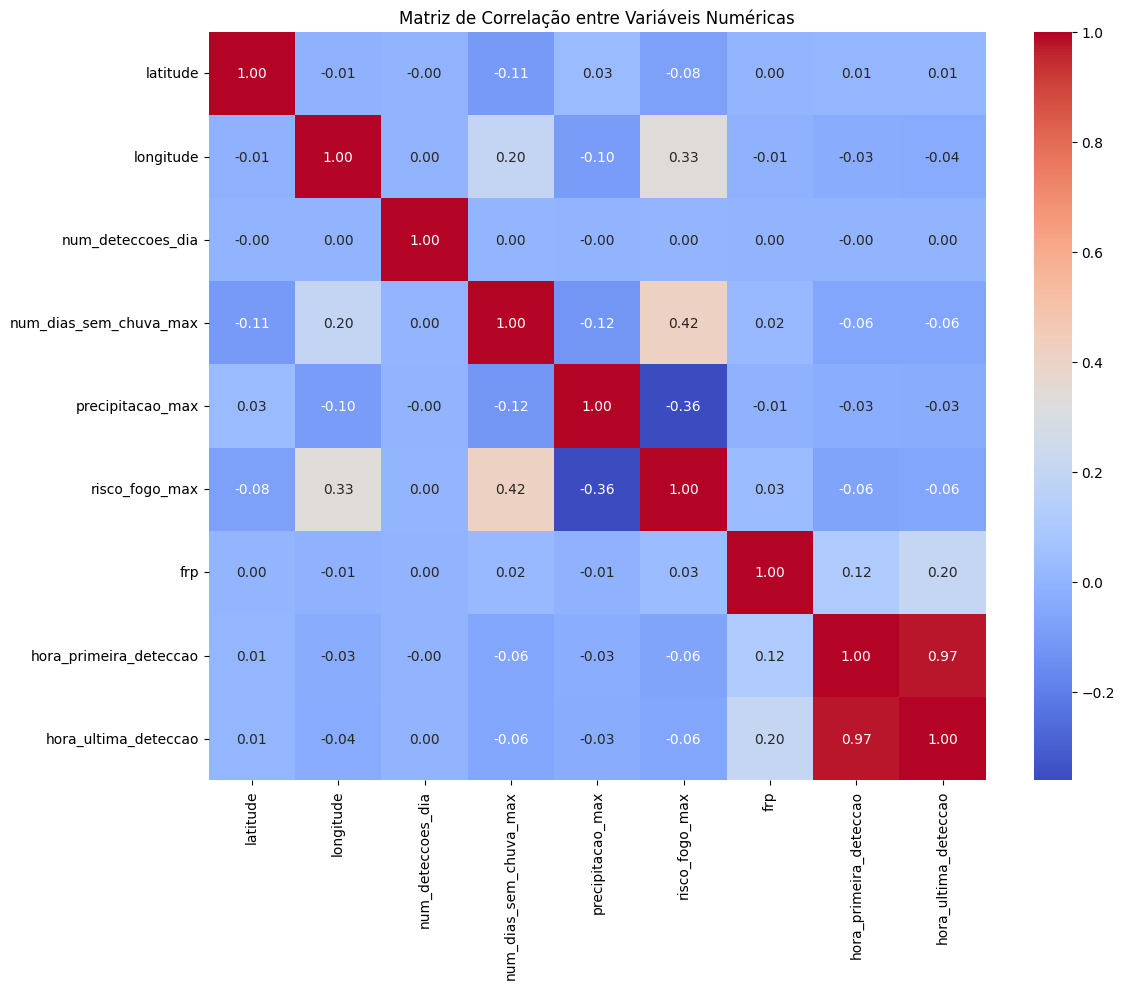

In [28]:
corr_pd = df_daily.select(NUMERIC_COLS).to_pandas().corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_pd, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

Para a análise de correlação entre variáveis categóricas, utilizamos o V de Cramer, computado como:
$$
V = \sqrt{\frac{\mathrm{χ}^2}{n \times \min(k - 1, r - 1)}},
$$
Onde:
- $\mathrm{χ}^2$ é o valor do teste qui-quadrado;
- $n$ é o número de elementos incluídos na tabela;
- $k$ é o número de colunas;
- $r$ é o número de linhas.

Quanto mais próximo V é de 0, menor é a associação entre as variáveis analisadas.

In [29]:
from scripts.cramers import Cramers
import itertools

cat_corr = []
for x1, x2 in itertools.combinations(CATEGORICAL_COLS, 2):
    v = Cramers(df_daily, x1, x2).compute_v()
    cat_corr.append({
        'var1': x1,
        'var2': x2,
        'cramers_v': v,
    })

cat_corr_df = pl.DataFrame(cat_corr).sort('cramers_v', descending=True)
cat_corr_df

var1,var2,cramers_v
str,str,f64
"""mes""","""trimestre""",1.0
"""mes""","""estacao_ano""",1.0
"""dia_ano""","""semana_ano""",1.0
"""dia_ano""","""trimestre""",0.997706
"""dia_ano""","""estacao_ano""",0.995317
…,…,…
"""dia_semana""","""periodo_climatico""",0.02566
"""mes""","""dia_semana""",0.024703
"""dia_semana""","""estacao_ano""",0.020388


## Análise de sazonalidade

In [30]:
out_season = {}

df_m = (
    df_daily
    .with_columns([
        pl.col("data_dia").dt.truncate("1mo").alias("mes_inicio"),
        pl.col("data_dia").dt.year().alias("ano_mes_year"),
        pl.col("data_dia").dt.month().alias("ano_mes_month"),
        pl.col("data_dia").dt.day().alias("dia_mes"),
    ])
    .with_columns([
        (pl.col("ano_mes_year").cast(pl.Utf8) + "-" +
         pl.col("ano_mes_month").cast(pl.Utf8).str.zfill(2)).alias("ano_mes"),

        pl.col("mes_inicio").dt.month_end().dt.day().alias("dias_no_mes"),

        (pl.col("latitude").round(4).cast(pl.Utf8) + "_" + pl.col("longitude").round(4).cast(pl.Utf8)).alias("pt")
    ])
)

# Média por mês ao longo dos anos
monthly = (
    df_m.group_by(["mes_inicio", "ano_mes_year", "ano_mes_month", "ano_mes", "dias_no_mes"])
        .agg([
            pl.len().alias("n_dias_com_evento"),
            pl.col("num_deteccoes_dia").sum().alias("total_deteccoes_mes"),
            pl.col("num_deteccoes_dia").mean().alias("media_deteccoes_por_dia_evento"),
            pl.col("num_deteccoes_dia").median().alias("mediana_deteccoes_por_dia_evento"),
            pl.col("num_deteccoes_dia").quantile(0.9).alias("p90_deteccoes_por_dia_evento"),
            pl.col("num_deteccoes_dia").quantile(0.95).alias("p95_deteccoes_por_dia_evento"),

            (pl.col("num_deteccoes_dia").sum() / pl.col("dias_no_mes").first()).alias("deteccoes_por_dia_calendario"),

            pl.n_unique("pt").alias("n_pontos_distintos"),

            pl.col("frp").sum().alias("frp_total_mes"),
            pl.col("frp").mean().alias("frp_medio_dia_evento"),
            pl.col("frp").median().alias("frp_mediano_dia_evento"),
            pl.col("frp").quantile(0.9).alias("frp_p90_dia_evento"),
            pl.col("frp").quantile(0.95).alias("frp_p95_dia_evento"),

            (pl.col("frp").sum() / pl.col("num_deteccoes_dia").sum()).alias("frp_por_deteccao"),

            pl.col("num_dias_sem_chuva_max").mean().alias("mean_dias_sem_chuva_max"),
            pl.col("num_dias_sem_chuva_max").quantile(0.9).alias("p90_dias_sem_chuva_max"),

            pl.col("precipitacao_max").mean().alias("mean_precipitacao_max"),
            pl.col("precipitacao_max").quantile(0.9).alias("p90_precipitacao_max"),

            pl.col("risco_fogo_max").mean().alias("mean_risco_fogo_max"),
            pl.col("risco_fogo_max").quantile(0.9).alias("p90_risco_fogo_max"),
        ])
        .sort("mes_inicio")
)
out_season['monthly_summary'] = monthly

# Média por mês do ano e bioma ao longo dos anos
monthly_by_bioma = (
    df_m.group_by(["bioma", "mes_inicio", "ano_mes_year", "ano_mes_month", "dias_no_mes"])
        .agg([
            pl.len().alias("n_dias_com_evento"),
            pl.col("num_deteccoes_dia").sum().alias("total_deteccoes_mes"),
            (pl.col("num_deteccoes_dia").sum() / pl.col("dias_no_mes").first()).alias("deteccoes_por_dia_calendario"),
            pl.n_unique("pt").alias("n_pontos_distintos"),

            pl.col("frp").sum().alias("frp_total_mes"),
            (pl.col("frp").sum() / pl.col("num_deteccoes_dia").sum()).alias("frp_por_deteccao"),

            pl.col("num_dias_sem_chuva_max").mean().alias("mean_dias_sem_chuva_max"),
            pl.col("precipitacao_max").mean().alias("mean_precipitacao_max"),
            pl.col("risco_fogo_max").mean().alias("mean_risco_fogo_max"),
        ])
        .sort(["bioma", "mes_inicio"])
)
out_season['monthly_by_bioma_summary'] = monthly_by_bioma

# Média + dispersão por mês do ano ao longo dos anos
climatology = (
    monthly.group_by("ano_mes_month")
           .agg([
               pl.col("total_deteccoes_mes").mean().alias("mean_total_deteccoes_mes"),
               pl.col("total_deteccoes_mes").std().alias("std_total_deteccoes_mes"),
               pl.col("total_deteccoes_mes").quantile(0.1).alias("p10_total_deteccoes_mes"),
               pl.col("total_deteccoes_mes").quantile(0.9).alias("p90_total_deteccoes_mes"),

               pl.col("frp_total_mes").mean().alias("mean_frp_total_mes"),
               pl.col("frp_total_mes").std().alias("std_frp_total_mes"),
               pl.col("frp_total_mes").quantile(0.1).alias("p10_frp_total_mes"),
               pl.col("frp_total_mes").quantile(0.9).alias("p90_frp_total_mes"),

               pl.col("deteccoes_por_dia_calendario").mean().alias("mean_det_por_dia_cal"),
               pl.col("frp_por_deteccao").mean().alias("mean_frp_por_deteccao"),

               pl.col("mean_dias_sem_chuva_max").mean().alias("mean_mean_dias_sem_chuva_max"),
               pl.col("mean_precipitacao_max").mean().alias("mean_mean_precipitacao_max"),
               pl.col("mean_risco_fogo_max").mean().alias("mean_mean_risco_fogo_max"),
           ])
           .sort("ano_mes_month")
           .rename({"ano_mes_month": "mes_num"})
)
out_season['climatology_summary'] = climatology

# Média por mês do ano e bioma ao longo dos anos
climatology_bioma = (
    monthly_by_bioma.group_by(["bioma", "ano_mes_month"])
        .agg([
            pl.col("total_deteccoes_mes").mean().alias("mean_total_deteccoes_mes"),
            pl.col("total_deteccoes_mes").std().alias("std_total_deteccoes_mes"),
            pl.col("frp_total_mes").mean().alias("mean_frp_total_mes"),
            pl.col("frp_total_mes").std().alias("std_frp_total_mes"),
            pl.col("deteccoes_por_dia_calendario").mean().alias("mean_det_por_dia_cal"),
            pl.col("frp_por_deteccao").mean().alias("mean_frp_por_deteccao"),
        ])
        .sort(["bioma", "ano_mes_month"])
        .rename({"ano_mes_month": "mes_num"})
)

out_season['climatology_by_bioma_summary'] = climatology_bioma

## Tratamento de valores nulos

Vamos remover os poucos registros com a coluna de bioma nula. A maior concentração de nulos está nas colunas de número de dias sem chuva, precipitação e risco de fogo.

In [31]:
df_daily = df_daily.drop_nulls(subset=['bioma'])
print(f'\nDimensões após remoção de nulos em bioma: {df_daily.height:,} linhas x {df_daily.width} colunas')


Dimensões após remoção de nulos em bioma: 13,586,093 linhas x 21 colunas


In [32]:
df_na = df_daily.filter(
    pl.any_horizontal(pl.all().is_null())
)
print(f"\nDimensões do dataframe de nulos: {df_na.height:,} linhas x {df_na.width} colunas")


Dimensões do dataframe de nulos: 417,569 linhas x 21 colunas


### Distribuição dos dados faltantes por ano
**Insight**: Todos os anos possuem valores faltantes, mas a maior quantidade pertence ao ano de 2022, com 6,3% de valores ausentes.

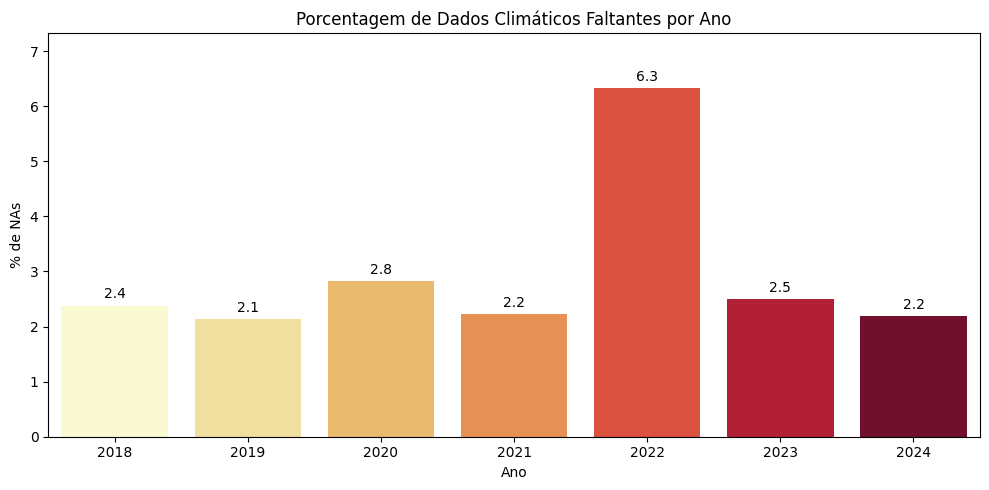

In [33]:
na_per_year = (
    df_na
    .group_by('ano')
    .agg(pl.len().alias('count_na'))
    .sort('ano')
)
total_per_year = (
    df_daily
    .group_by('ano')
    .agg(pl.len().alias('count_total'))
    .sort('ano')
)

temporal = (
    na_per_year
    .join(total_per_year, on='ano', how='left')
    .with_columns([
        ((pl.col('count_na') / pl.col('count_total')) * 100)
        .round(2)
        .alias('perc_na')
    ])
)
temporal_pd = temporal.to_pandas()

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    temporal_pd, x='ano', y='perc_na', hue='ano',
    legend=False, palette='YlOrRd'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Porcentagem de Dados Climáticos Faltantes por Ano')
plt.ylabel('% de NAs')
plt.xlabel('Ano')
plt.ylim(0, temporal_pd['perc_na'].max() + 1)
plt.tight_layout()
plt.show()

### Distribuição espaço-temporal dos dados faltantes
**Insight**: Há uma certa variação na distribuição espacial ao longo dos anos, mas é possível perceber que há uma tendência de maior concentração em áreas próximas às regiões costeiras do Brasil.

In [34]:
# Agrupamento dos pontos geográficos para melhor performance
df_na_geo = (
    df_na
    .with_columns([
        (pl.col('latitude') // 0.3 * 0.3).alias('lat_bin'),
        (pl.col('longitude') // 0.3 * 0.3).alias('lon_bin')
    ])
    .group_by(['ano', 'lat_bin', 'lon_bin', 'bioma'])
    .agg(pl.len().alias('count'))
    .sort('ano')
)

fig = px.density_map(
    df_na_geo,
    lat='lat_bin',
    lon='lon_bin',
    z='count',
    animation_frame='ano',
    radius=15,
    zoom=3,
    center=dict(lat=-14.2, lon=-51.9),
    map_style='carto-positron',
    color_continuous_scale='YlOrRd',
    title='Distribuição Geográfica de Dados Climáticos Faltantes no Brasil por Ano',
    height=700,
    range_color=[0, None]
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    sliders=[{
        'currentvalue': {
            'prefix': 'Ano: ',
            'font': {'size': 20}
        }
    }]
)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500

fig.show()

### Distribuição dos dados faltantes por bioma
**Insight**: o bioma com maior quantidade de dados faltantes é a Amazônia.

In [35]:
na_biome = (
    df_na
    .group_by('bioma')
    .agg(pl.len().alias('count_na'))
    .sort('count_na', descending=True)
)

total_biome = (
    df_daily
    .group_by('bioma')
    .agg(pl.len().alias('count_total'))
)

biome_comp = (
    na_biome
    .join(total_biome, on='bioma', how='left')
    .with_columns([
        ((pl.col('count_na') / pl.col('count_total')) * 100)
        .round(2)
        .alias('perc_na')
    ])
    .with_columns([
        pl.col('count_na').map_elements(
            lambda x: f"{x:_.0f}".replace('_', '.'), # Formata contagem para hover
            return_dtype=pl.Utf8
        ).alias('count_na_fmt'),
        pl.col('count_total').map_elements(
            lambda x: f"{x:_.0f}".replace('_', '.'), # Formata contagem para hover
            return_dtype=pl.Utf8
        ).alias('count_total_fmt')
    ])
)

fig = px.scatter(
    biome_comp,
    x='perc_na',
    y='count_na',
    size='count_total',
    color='bioma',
    text='bioma',
    size_max=60,
    custom_data=['count_na_fmt', 'count_total_fmt'],
    labels={
        'perc_na': 'Porcentagem de Dados Faltantes (%)',
        'count_na': 'Quantidade Absoluta de NAs',
        'count_total': 'Total de Registros'
    },
    title='Dados Climáticos Faltantes por Bioma',
    height=700,
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Ajusta posição dos labels
fig.update_traces(
    textposition='top center',
    hovertemplate='<b>%{text}</b><br>' +
                  'Porcentagem: %{x:.1f}%<br>' +
                  'Quantidade absoluta: %{customdata[0]}<br>' +
                  'Total de registros: %{customdata[1]}' +
                  '<extra></extra>',
)

fig.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    xaxis=dict(title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    showlegend=False,
    font=dict(size=12)
)

fig.show()

### Imputação
Os dados faltantes serão imputados seguindo esta estratégia:
1. mediana baseada na região geográfica próxima ou;
2. mediana por bioma;
3. mediana global.

In [36]:
CLIMATE_COLS = ['num_dias_sem_chuva_max', 'precipitacao_max', 'risco_fogo_max']

df_daily = (
    df_daily
    .with_columns([
        (pl.col('latitude') // 0.3 * 0.3).alias('lat_bin'),
        (pl.col('longitude') // 0.3 * 0.3).alias('lon_bin')
    ])
)

for col in CLIMATE_COLS:
    missing_before = df_daily.select(pl.col(col).is_null().sum()).item()

    df_daily = df_daily.with_columns([
        pl.col(col).fill_null(
            pl.col(col).median().over(['lat_bin', 'lon_bin'])
        ).alias(f'{col}_temp1')
    ])

    df_daily = df_daily.with_columns([
        pl.col(f'{col}_temp1').fill_null(
            pl.col(f'{col}_temp1').median().over('bioma')
        ).alias(f'{col}_temp2')
    ])

    df_daily = df_daily.with_columns([
        pl.col(f'{col}_temp2').fill_null(
            pl.col(f'{col}_temp2').median()
        ).alias(col)
    ])

    df_daily = df_daily.drop([f'{col}_temp1', f'{col}_temp2'])

    missing_after = df_daily.select(pl.col(col).is_null().sum()).item()
    print(f'Faltantes antes: {missing_before} -> Faltantes depois: {missing_after}')

Faltantes antes: 281179 -> Faltantes depois: 0
Faltantes antes: 111762 -> Faltantes depois: 0
Faltantes antes: 266643 -> Faltantes depois: 0


In [37]:
df_daily.null_count()

latitude,longitude,data_dia,bioma,estado,num_deteccoes_dia,num_dias_sem_chuva_max,precipitacao_max,risco_fogo_max,frp,ano,mes,dia_ano,dia_semana,semana_ano,trimestre,periodo_dia_predominante,estacao_ano,periodo_climatico,hora_primeira_deteccao,hora_ultima_deteccao,lat_bin,lon_bin
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exportação de datasets finais

In [38]:
df_final_regression = df_daily.drop(['lat_bin', 'lon_bin'])

Vamos exportar datasets para duas atividades diferentes: regressão e classificação.

> O FRP sofre influência de ângulo de observação, condições de relevo, condições atmosféricas e não existe uma classificação pré-definida e nem uma escala que permita alguma inferência do tipo da combustão. Por exemplo, o sensor no satélite irá indicar para um píxel o mesmo FRP tanto de uma pequena área queimando com alta temperatura, como de uma área maior, com combustão de menor temperatura. É necessário trabalhar com os dados explorando seus valores para cada região e período, a partir de valores de referências de alvos conhecidos no solo. Assim, o uso do FRP para casos pontuais implica em medidas imprecisas, porém em uma escala regional os resultados podem indicar valores médios aceitáveis da massa de vegetação queimada, e neste contexto o Programa Queimadas do INPE calcula e divulga os valores de FRP (INPE, 2020).

In [39]:
df_final_regression.write_parquet('../data/processed/queimadas_regression.parquet', compression='snappy')

In [40]:
df_final_classification = df_final_regression.clone()

df_final_classification = df_final_classification.with_columns(
    pl.col('frp').qcut(
        quantiles=3,
        labels=['baixa', 'media', 'alta']
    )
    .cast(pl.Categorical)
    .alias('label_intensidade')
)
df_final_classification = df_final_classification.drop(['frp'])

df_final_classification.write_parquet('../data/processed/queimadas_regression.parquet', compression='snappy')

In [41]:
monthly.write_parquet('../data/processed/queimadas_monthly.parquet', compression='snappy')
monthly_by_bioma.write_parquet('../data/processed/queimadas_monthly_by_bioma.parquet', compression='snappy')
climatology.write_parquet('../data/processed/queimadas_climatology.parquet', compression='snappy')
climatology_bioma.write_parquet('../data/processed/queimadas_climatology_by_bioma.parquet', compression='snappy')

## Modelagem: CNN em PyTorch<bk>
Implementação do modelo de rede neural convolucional (CNN) usando PyTorch para prever ocorrência de queimadas. O modelo usará:<bk>

Treino: Dados de 2023<bk>

Validação: Dados de 2024<bk>

Entrada: Grid espacial-temporal 50×50 com 12 meses<bk>

Saída: Probabilidade de queimada (classificação binária)

In [67]:
# Instalar PyTorch (se necessário)
import subprocess
import sys

try:
    import torch
    print(f"PyTorch já instalado: versão {torch.__version__}")
except ImportError:
    print("Instalando PyTorch...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "torch"])
    import torch
    print(f"PyTorch instalado: versão {torch.__version__}")

PyTorch já instalado: versão 2.9.1+cpu


In [177]:
from collections import Counter
Counter(labels)


Counter({'4.606.182': 1})

In [197]:
# ===== DATASET MENSAL MULTICLASSE (CORRETO) =====

import numpy as np
import polars as pl
import torch
from torch.utils.data import Dataset, DataLoader

class FireDatasetMonthly(Dataset):
    def __init__(self, grids, labels, class_to_idx):
        self.X = torch.tensor(grids, dtype=torch.float32)
        self.y = torch.tensor([class_to_idx[l] for l in labels], dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


def prepare_fire_grids_monthly(df, year_range):
    lat_bins = np.linspace(-33, 5, 51)
    lon_bins = np.linspace(-75, -30, 51)

    grids, labels, keys = [], [], []

    # thresholds (ajustáveis depois)
    frp_low = 10
    frp_high = 50

    for year in year_range:
        df_year = df.filter(pl.col("ano") == year)

        for month in range(1, 13):
            df_month = df_year.filter(pl.col("mes") == month)
            if df_month.is_empty():
                continue

            # Heatmap espacial
            counts, _, _ = np.histogram2d(
                df_month["latitude"].to_numpy(),
                df_month["longitude"].to_numpy(),
                bins=[lat_bins, lon_bins]
            )

            if counts.max() > 0:
                counts /= counts.max()

            grids.append(counts[np.newaxis, :, :])  # (1, 50, 50)

            # 🔥 FRP MÉDIO MENSAL
            mean_frp = df_month["frp"].mean()

            if mean_frp < frp_low:
                labels.append("baixo")
            elif mean_frp < frp_high:
                labels.append("medio")
            else:
                labels.append("alto")

            keys.append(f"{year}-{month:02d}")

    return np.array(grids), labels, keys


## Linha com colunas

In [179]:
# primeira linha como DataFrame
print(df.head(1))

# primeira linha como dict (coluna -> valor)
print(df.row(0, named=True))

# primeira linha via slice
print(df.slice(0, 1))


shape: (1, 21)
┌──────────┬───────────┬────────────┬──────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ latitude ┆ longitude ┆ data_pas   ┆ satelite ┆ … ┆ periodo_d ┆ estacao_a ┆ periodo_c ┆ data_dia  │
│ ---      ┆ ---       ┆ ---        ┆ ---      ┆   ┆ ia        ┆ no        ┆ limatico  ┆ ---       │
│ f64      ┆ f64       ┆ datetime[μ ┆ cat      ┆   ┆ ---       ┆ ---       ┆ ---       ┆ date      │
│          ┆           ┆ s]         ┆          ┆   ┆ cat       ┆ cat       ┆ cat       ┆           │
╞══════════╪═══════════╪════════════╪══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ -10.3046 ┆ -43.3636  ┆ 2022-09-30 ┆ GOES-16  ┆ … ┆ Tarde     ┆ Primavera ┆ Seco      ┆ 2022-09-3 │
│          ┆           ┆ 13:56:04   ┆          ┆   ┆           ┆           ┆           ┆ 0         │
└──────────┴───────────┴────────────┴──────────┴───┴───────────┴───────────┴───────────┴───────────┘
{'latitude': -10.3046, 'longitude': -43.3636, 'data_pas': datetime.datetime(

## Dataset mensal multiclasse

In [198]:
# ===== MAPEAMENTO DE CLASSES =====

class_to_idx = {
    "baixo": 0,
    "medio": 1,
    "alto": 2
}

idx_to_class = {v: k for k, v in class_to_idx.items()}

print("Classes:", class_to_idx)


Classes: {'baixo': 0, 'medio': 1, 'alto': 2}


In [204]:
# ===== DATASET MENSAL MULTICLASSE (CORRIGIDO) =====

import numpy as np
import polars as pl
import torch
from torch.utils.data import Dataset

class FireDatasetMonthly(Dataset):
    def __init__(self, grids, labels, class_to_idx):
        self.X = torch.tensor(grids, dtype=torch.float32)
        self.y = torch.tensor([class_to_idx[l] for l in labels], dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
def prepare_fire_grids_monthly(
    df,
    year_range,
    lat_bins=None,
    lon_bins=None
):
    """
    Cada amostra = 1 MÊS
    Input : (1, 50, 50)
    Rótulo: intensidade mensal baseada no FRP médio
    """

    if lat_bins is None:
        lat_bins = np.linspace(-33, 5, 51)
    if lon_bins is None:
        lon_bins = np.linspace(-75, -30, 51)

    grids = []
    frp_monthly = []
    keys = []

    for year in year_range:
        df_year = df.filter(pl.col("ano") == year)
        if df_year.is_empty():
            continue

        for month in range(1, 13):
            df_month = df_year.filter(pl.col("mes") == month)
            if df_month.is_empty():
                continue

            # 🔹 GRID ESPACIAL
            counts, _, _ = np.histogram2d(
                df_month["latitude"].to_numpy(),
                df_month["longitude"].to_numpy(),
                bins=[lat_bins, lon_bins]
            )

            if counts.max() > 0:
                counts /= counts.max()

            grids.append(counts[np.newaxis, :, :])

            # 🔹 FRP MÉDIO MENSAL (INTENSIDADE REAL)
            frp_mean = df_month.select(pl.col("frp").mean()).item()
            frp_monthly.append(frp_mean)

            keys.append(f"{year}-{month:02d}")
    print(f'Total de amostras mensais: {len(grids)}')
    print(f'FRP médio mensal geral: {np.mean(frp_monthly):.2f}')
    print()
    # 🔹 QUANTIS GLOBAIS → 3 CLASSES
    q1, q2 = np.quantile(frp_monthly, [0.33, 0.66])

    labels = []
    for frp in frp_monthly:
        if frp <= q1:
            labels.append("baixo")
        elif frp <= q2:
            labels.append("medio")
        else:
            labels.append("alto")

    return np.array(grids), labels, keys


In [220]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from collections import Counter

class_to_idx = {"baixo": 0, "medio": 1, "alto": 2}
idx_to_class = {v: k for k, v in class_to_idx.items()}

X, y, keys = prepare_fire_grids_monthly(df, range(2018, 2024))

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.5, stratify=y_tmp, random_state=42
)

print("📊 TRAIN:", Counter(y_train))
print("📊 VAL  :", Counter(y_val))
print("📊 TEST :", Counter(y_test))

train_ds = FireDatasetMonthly(X_train, y_train, class_to_idx)
val_ds   = FireDatasetMonthly(X_val, y_val, class_to_idx)
test_ds  = FireDatasetMonthly(X_test, y_test, class_to_idx)

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=8)
test_loader  = DataLoader(test_ds, batch_size=8)


📊 TRAIN: Counter({'alto': 17, 'baixo': 16, 'medio': 15})
📊 VAL  : Counter({'alto': 4, 'baixo': 3, 'medio': 3})
📊 TEST : Counter({'baixo': 4, 'medio': 4, 'alto': 3})


In [ ]:
import torch.nn as nn

class FireCNN_Small(nn.Module):
    def __init__(self,num_classes=3): #num_classes=3 é pra deixar o cnn_small, remover se trazer de volta as partes comentadas desta celula
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            #com valores 1,12,3-> overfit demais
            #com valores 1,8,3 -> underfit demais
        )

        """self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16 * 12 * 12, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 3)
        )
        remover isso aqui pra tentar emburrecer meu cnn, ta mt overfits"""
        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d(1)

        self.classifier = nn.Linear(64, num_classes)
    """def forward(self, x):
        x = self.features(x)
        return self.classifier(x)
        isso aqui tbm é da parte comentada de cima"""
    def forward(self, x):
        x = self.features(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        return self.classifier(x)

In [ ]:
import torch.nn.functional as F
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def compute_multiclass_metrics(y_true, y_logits):
    y_true = np.array(y_true)
    y_prob = F.softmax(torch.tensor(y_logits), dim=1).numpy()
    y_pred = np.argmax(y_prob, axis=1)

    acc = (y_pred == y_true).mean()

    metrics = {}
    for i in range(3):
        tp = np.sum((y_pred == i) & (y_true == i))
        fp = np.sum((y_pred == i) & (y_true != i))
        fn = np.sum((y_pred != i) & (y_true == i))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        metrics[idx_to_class[i]] = {"precision": precision, "recall": recall, "f1": f1}

    return {"acc": acc, "per_class": metrics}


In [244]:
def train_epoch(model, loader, criterion, optimizer):
    model.train()
    loss_total = 0
    y_true, y_logits = [], []

    for X, y in loader:
        X, y = X.to(device), y.to(device)

        logits = model(X)
        loss = criterion(logits, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_total += loss.item()
        y_true.extend(y.cpu().numpy())
        y_logits.extend(logits.detach().cpu().numpy())

    return loss_total / len(loader), compute_multiclass_metrics(y_true, y_logits)


def validate_epoch(model, loader, criterion):
    model.eval()
    loss_total = 0
    y_true, y_logits = [], []

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            logits = model(X)
            loss = criterion(logits, y)

            loss_total += loss.item()
            y_true.extend(y.cpu().numpy())
            y_logits.extend(logits.cpu().numpy())

    return loss_total / len(loader), compute_multiclass_metrics(y_true, y_logits)


In [248]:
"""model = FireCNN().to(device) também é do cnn mais complexo q eu usei antes"""
model = FireCNN_Small(num_classes=3).to(device)
class_weights = torch.tensor([1.0, 1.0, 1.0]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print("🚀 Treinando CNN small mensal multiclasse\n")

for epoch in range(20):
    train_loss, train_metrics = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_metrics = validate_epoch(model, val_loader, criterion)

    print(
        f"Epoch {epoch+1:02d} | "
        f"Train Loss: {train_loss:.4f} | Acc: {train_metrics['acc']:.3f} || "
        f"Val Loss: {val_loss:.4f} | Acc: {val_metrics['acc']:.3f}"
    )

print("✅ Treinamento concluído")


🚀 Treinando CNN small mensal multiclasse

Epoch 01 | Train Loss: 1.1031 | Acc: 0.354 || Val Loss: 1.0639 | Acc: 0.400
Epoch 02 | Train Loss: 1.1007 | Acc: 0.354 || Val Loss: 1.0703 | Acc: 0.400
Epoch 03 | Train Loss: 1.0991 | Acc: 0.354 || Val Loss: 1.0742 | Acc: 0.400
Epoch 04 | Train Loss: 1.0981 | Acc: 0.354 || Val Loss: 1.0760 | Acc: 0.400
Epoch 05 | Train Loss: 1.0991 | Acc: 0.354 || Val Loss: 1.0796 | Acc: 0.400
Epoch 06 | Train Loss: 1.0980 | Acc: 0.354 || Val Loss: 1.0822 | Acc: 0.400
Epoch 07 | Train Loss: 1.0979 | Acc: 0.354 || Val Loss: 1.0841 | Acc: 0.400
Epoch 08 | Train Loss: 1.0968 | Acc: 0.354 || Val Loss: 1.0840 | Acc: 0.400
Epoch 09 | Train Loss: 1.0980 | Acc: 0.354 || Val Loss: 1.0820 | Acc: 0.400
Epoch 10 | Train Loss: 1.0974 | Acc: 0.354 || Val Loss: 1.0844 | Acc: 0.400
Epoch 11 | Train Loss: 1.0968 | Acc: 0.354 || Val Loss: 1.0854 | Acc: 0.400
Epoch 12 | Train Loss: 1.0967 | Acc: 0.354 || Val Loss: 1.0854 | Acc: 0.400
Epoch 13 | Train Loss: 1.0965 | Acc: 0.354 || 

In [249]:
# ===== TABELA DE RESULTADOS DO TREINAMENTO =====

import pandas as pd

# Criar DataFrame com histórico
df_history = pd.DataFrame({
    "Época": range(1, len(history["train_loss"]) + 1),
    "Train Loss": history["train_loss"],
    "Train Acc": history["train_acc"],
    "Val Loss": history["val_loss"],
    "Val Acc": history["val_acc"],
})

# Mostrar tabela
display(df_history.round(4))


,Época,Train Loss,Train Acc,Val Loss,Val Acc
0,1,1.0952,0.3542,1.0898,0.4
1,2,1.0947,0.3542,1.0896,0.4
2,3,1.0946,0.3542,1.0890,0.4
3,4,1.0943,0.3542,1.0912,0.4
4,5,1.0940,0.3542,1.0904,0.4
5,6,1.0934,0.3542,1.0900,0.4
6,7,1.0934,0.3542,1.0935,0.4
7,8,1.0922,0.3542,1.0945,0.4
8,9,1.0925,0.3542,1.0927,0.4
9,10,1.0914,0.3542,1.0939,0.4


In [247]:
# ===== LOOP DE TREINAMENTO (CNN MENSAL MULTICLASSE) =====

num_epochs = 20

history = {
    'train_loss': [],
    'val_loss': [],
    'test_loss': [],
    'train_acc': [],
    'val_acc': [],
    'test_acc': []
}

for epoch in range(1, num_epochs + 1):

    train_loss, train_metrics = train_epoch_multiclass(
        model, train_loader, criterion, optimizer, device
    )

    val_loss, val_metrics = validate_multiclass(
        model, val_loader, criterion, device
    )

    test_loss, test_metrics = validate_multiclass(
        model, test_loader, criterion, device
    )

    # ---- salvar histórico ----
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['test_loss'].append(test_loss)

    history['train_acc'].append(train_metrics['acc'])
    history['val_acc'].append(val_metrics['acc'])
    history['test_acc'].append(test_metrics['acc'])

    # ---- scheduler ----
    scheduler.step(val_loss)

    print(
        f"Epoch {epoch:02d} | "
        f"Train Loss: {train_loss:.4f} | Acc: {train_metrics['acc']:.3f} || "
        f"Val Loss: {val_loss:.4f} | Acc: {val_metrics['acc']:.3f}"
    )

print("✅ Treinamento concluído")


Epoch 01 | Train Loss: 1.0952 | Acc: 0.354 || Val Loss: 1.0898 | Acc: 0.400
Epoch 02 | Train Loss: 1.0947 | Acc: 0.354 || Val Loss: 1.0896 | Acc: 0.400
Epoch 03 | Train Loss: 1.0946 | Acc: 0.354 || Val Loss: 1.0890 | Acc: 0.400
Epoch 04 | Train Loss: 1.0943 | Acc: 0.354 || Val Loss: 1.0912 | Acc: 0.400
Epoch 05 | Train Loss: 1.0940 | Acc: 0.354 || Val Loss: 1.0904 | Acc: 0.400
Epoch 06 | Train Loss: 1.0934 | Acc: 0.354 || Val Loss: 1.0900 | Acc: 0.400
Epoch 07 | Train Loss: 1.0934 | Acc: 0.354 || Val Loss: 1.0935 | Acc: 0.400
Epoch 08 | Train Loss: 1.0922 | Acc: 0.354 || Val Loss: 1.0945 | Acc: 0.400
Epoch 09 | Train Loss: 1.0925 | Acc: 0.354 || Val Loss: 1.0927 | Acc: 0.400
Epoch 10 | Train Loss: 1.0914 | Acc: 0.354 || Val Loss: 1.0939 | Acc: 0.400
Epoch 11 | Train Loss: 1.0921 | Acc: 0.354 || Val Loss: 1.0933 | Acc: 0.400
Epoch 12 | Train Loss: 1.0907 | Acc: 0.354 || Val Loss: 1.0985 | Acc: 0.400
Epoch 13 | Train Loss: 1.0896 | Acc: 0.354 || Val Loss: 1.0982 | Acc: 0.400
Epoch 14 | T

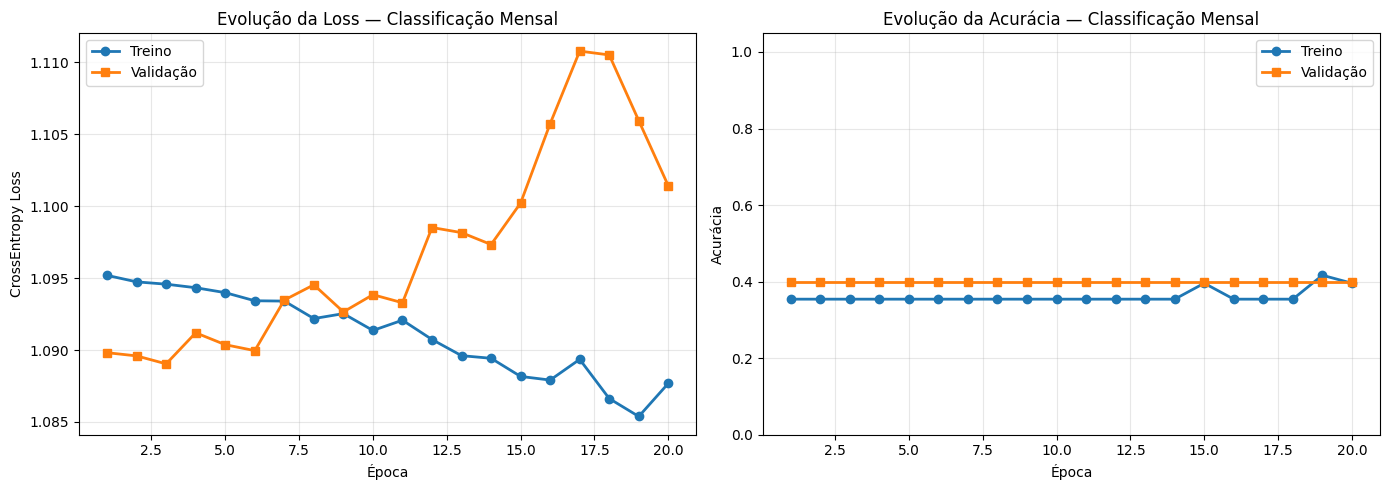

In [250]:
# ===== VISUALIZAR HISTÓRICO DE TREINAMENTO (CNN MENSAL MULTICLASSE) =====

import matplotlib.pyplot as plt

if 'history' in locals() and len(history['train_loss']) > 0:
    
    epochs = range(1, len(history['train_loss']) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # ---- LOSS ----
    axes[0].plot(
        epochs, history['train_loss'],
        label='Treino',
        linewidth=2, marker='o'
    )
    axes[0].plot(
        epochs, history['val_loss'],
        label='Validação',
        linewidth=2, marker='s'
    )

    axes[0].set_xlabel('Época')
    axes[0].set_ylabel('CrossEntropy Loss')
    axes[0].set_title('Evolução da Loss — Classificação Mensal')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # ---- ACURÁCIA ----
    axes[1].plot(
        epochs, history['train_acc'],
        label='Treino',
        linewidth=2, marker='o'
    )
    axes[1].plot(
        epochs, history['val_acc'],
        label='Validação',
        linewidth=2, marker='s'
    )

    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Acurácia')
    axes[1].set_ylim([0, 1.05])
    axes[1].set_title('Evolução da Acurácia — Classificação Mensal')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

else:
    print("❌ Histórico de treinamento não encontrado.")


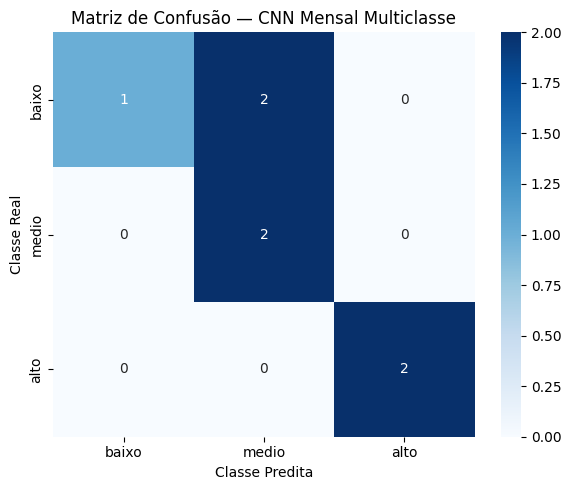

In [216]:
# ===== MATRIZ DE CONFUSÃO — CLASSIFICAÇÃO MENSAL =====

import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for X, y in test_loader:
        X = X.to(device)
        y = y.to(device)

        logits = model(X)
        preds = torch.argmax(logits, dim=1)

        y_true.extend(y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

classes = ['baixo', 'medio', 'alto']

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes,
    yticklabels=classes
)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão — CNN Mensal Multiclasse')
plt.tight_layout()
plt.show()


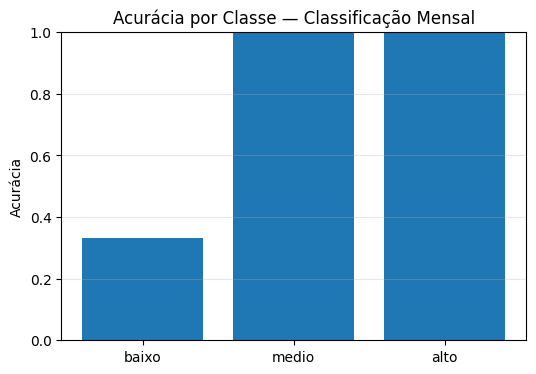

In [217]:
# ===== ACURÁCIA POR CLASSE =====

import numpy as np

class_acc = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(6,4))
plt.bar(classes, class_acc)
plt.ylim(0, 1.0)
plt.ylabel("Acurácia")
plt.title("Acurácia por Classe — Classificação Mensal")
plt.grid(axis='y', alpha=0.3)
plt.show()


KeyError: 'test_loss'

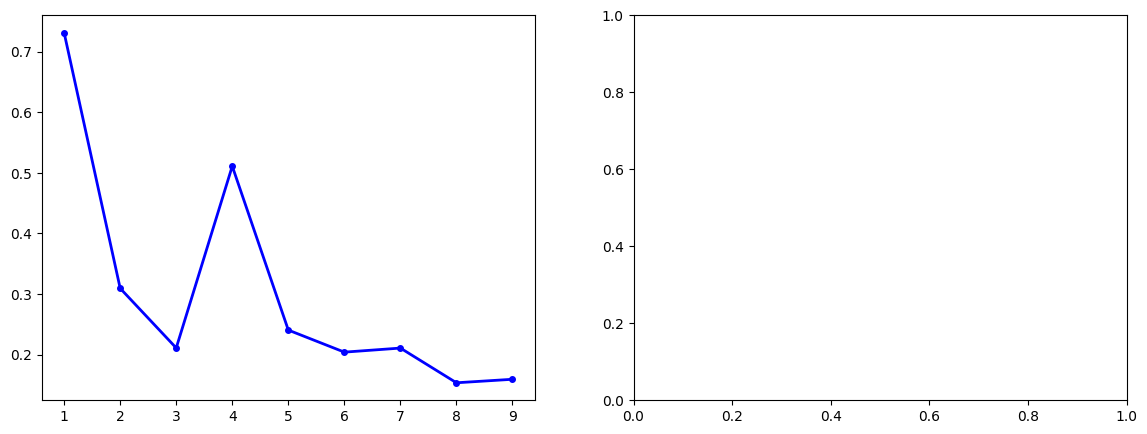

In [ ]:
# ===== VISUALIZAR HISTÓRICO DE TREINAMENTO =====

if 'history' in locals() and len(history['train_loss']) > 0:
    # Criar figura com 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot da loss
    epochs = range(1, len(history['train_loss']) + 1)
    axes[0].plot(epochs, history['train_loss'], 'b-', label='Treino (2018-2022)', linewidth=2, marker='o', markersize=4)
    axes[0].plot(epochs, history['test_loss'], 'g-', label='Teste (2021-2022)', linewidth=2, marker='s', markersize=4)
    axes[0].plot(epochs, history['val_loss'], 'r-', label='Validação (2023-2024)', linewidth=2, marker='^', markersize=4)
    axes[0].set_xlabel('Época', fontsize=12)
    axes[0].set_ylabel('Loss (CrossEntropyLoss)', fontsize=12)
    axes[0].set_title('Evolução da Loss durante o Treinamento (Multiclasse)', fontsize=13, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot da acurácia
    axes[1].plot(epochs, history['train_acc'], 'b-', label='Treino (2018-2022)', linewidth=2, marker='o', markersize=4)
    axes[1].plot(epochs, history['test_acc'], 'g-', label='Teste (2021-2022)', linewidth=2, marker='s', markersize=4)
    axes[1].plot(epochs, history['val_acc'], 'r-', label='Validação (2023-2024)', linewidth=2, marker='^', markersize=4)
    axes[1].set_xlabel('Época', fontsize=12)
    axes[1].set_ylabel('Acurácia', fontsize=12)
    axes[1].set_title('Evolução da Acurácia durante o Treinamento (Multiclasse)', fontsize=13, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_ylim([0, 1.05])
    
    plt.tight_layout()
    plt.savefig('../figures/cnn_training_history_multiclass.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    print("Gráficos salvos em '../figures/cnn_training_history_multiclass.png'")
else:
    print("Nenhum histórico de treinamento para visualizar.")

In [212]:
# ===== MELHOR ÉPOCA (MENOR VAL LOSS) =====

best_epoch = df_history["Val Loss"].idxmin()
best_row = df_history.loc[best_epoch]

print("🏆 Melhor época baseada na Val Loss:\n")
display(best_row.to_frame(name="Valor").round(4))


🏆 Melhor época baseada na Val Loss:



,Valor
Época,1.0000
Train Loss,0.7311
Train Acc,0.6190
Val Loss,1.1894
Val Acc,0.0000


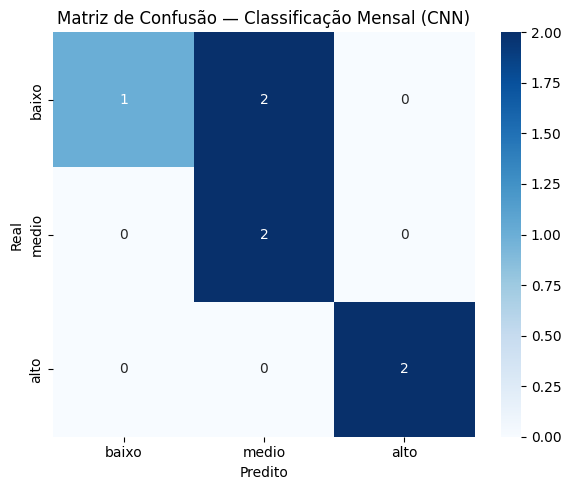

In [213]:
# ===== MATRIZ DE CONFUSÃO (TESTE) =====

import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)

        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Classes
class_names = ["baixo", "medio", "alto"]

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão — Classificação Mensal (CNN)")
plt.tight_layout()
plt.show()


# Baseline de risco com Random Forest (tabular classifier)
- Usa as features numéricas (lat/long, precipitação, dias sem chuva, frp, risco_fogo) e categóricas (estado, bioma, satelite, período/estação/mes).
- Rotula `baixo/medio/alto` por tercis do `frp` mensal.
- Serve como baseline rápido, sem grid espacial.


## Random Forest Classifier

Dataset original: (16652191, 21)
Dataset amostrado (1%): (166521, 12)
✓ Tamanho treino: (133216, 11)
✓ Tamanho teste: (33305, 11)
✓ Distribuição de classes (treino):
target
alto     45230
baixo    44219
medio    43767
Name: count, dtype: int64

🔄 Treinando modelo Random Forest (leve)...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.0s finished


✅ Modelo treinado com sucesso!


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished



RESULTADOS - Random Forest Baseline (1% amostra do dataset)
              precision    recall  f1-score   support

        alto      0.996     0.689     0.814     11308
       baixo      0.551     0.627     0.587     11055
       medio      0.503     0.593     0.545     10942

    accuracy                          0.637     33305
   macro avg      0.683     0.636     0.649     33305
weighted avg      0.686     0.637     0.650     33305



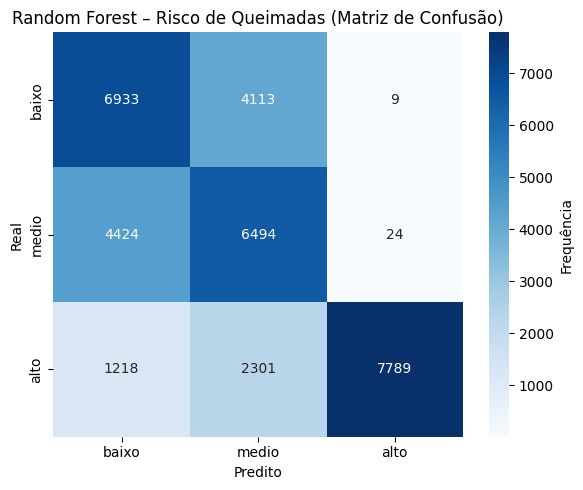

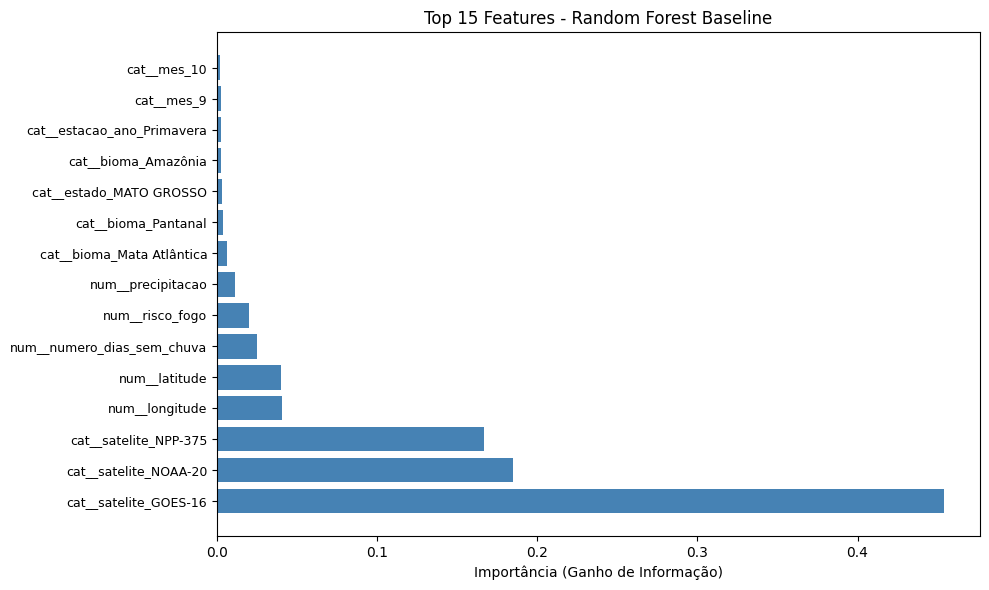


📊 Top 10 Features mais importantes:
    1. cat__satelite_GOES-16               : 0.4538
    2. cat__satelite_NOAA-20               : 0.1850
    3. cat__satelite_NPP-375               : 0.1669
    4. num__longitude                      : 0.0406
    5. num__latitude                       : 0.0403
    6. num__numero_dias_sem_chuva          : 0.0250
    7. num__risco_fogo                     : 0.0203
    8. num__precipitacao                   : 0.0112
    9. cat__bioma_Mata Atlântica           : 0.0062
   10. cat__bioma_Pantanal                 : 0.0038


In [47]:
# Baseline Random Forest (tabular)
import polars as pl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Seleciona colunas úteis - REDUZ DATASET para 1% amostral
cols_num = [
    "latitude", "longitude", "precipitacao", "numero_dias_sem_chuva", "risco_fogo", "frp"
]
cols_cat = [
    "estado", "bioma", "satelite", "periodo_climatico", "estacao_ano", "mes"
]

print(f"Dataset original: {df.shape}")

# Amostra 1% aleatória para caber na memória
df_sample = df.select(cols_num + cols_cat).sample(fraction=0.01, seed=42)

print(f"Dataset amostrado (1%): {df_sample.shape}")

# Converte para pandas
df_rf = df_sample.to_pandas()

# 2) Cria rótulos por tercis do FRP (baixo/médio/alto)
q1, q2 = df_rf["frp"].quantile([0.33, 0.66])
def label_frp(v):
    if v <= q1:
        return "baixo"
    if v <= q2:
        return "medio"
    return "alto"

df_rf["target"] = df_rf["frp"].apply(label_frp)

# 3) Split estratificado
X = df_rf.drop(columns=["target", "frp"])  # frp vira alvo, removido das features
y = df_rf["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Tamanho treino: {X_train.shape}")
print(f"✓ Tamanho teste: {X_test.shape}")
print(f"✓ Distribuição de classes (treino):\n{y_train.value_counts().sort_index()}")

# 4) Pipeline de pré-processamento + modelo
# Usa sparse_output=False para evitar matriz sparse gigante
preproc = ColumnTransformer(
    transformers=[
        ("num", "passthrough", cols_num[:-1]),  # sem frp
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False, max_categories=50), cols_cat),
    ]
)

# Parâmetros MUITO leves - modelo simples para baseline
rf = RandomForestClassifier(
    n_estimators=100,        # apenas 100 árvores
    max_depth=20,            # profundidade bem limitada
    min_samples_leaf=10,    # folhas com mínimo 10 amostras
    class_weight="balanced",
    n_jobs=1,               # SEM paralelização (salva memória)
    random_state=42,
    verbose=1,
)

model = Pipeline([
    ("pre", preproc),
    ("clf", rf),
])

print("\n🔄 Treinando modelo Random Forest (leve)...")
model.fit(X_train, y_train)
print("✅ Modelo treinado com sucesso!")

# 5) Avaliação
y_pred = model.predict(X_test)
print("\n" + "="*70)
print("RESULTADOS - Random Forest Baseline (1% amostra do dataset)")
print("="*70)
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=["baixo", "medio", "alto"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["baixo","medio","alto"], 
            yticklabels=["baixo","medio","alto"],
            cbar_kws={"label": "Frequência"})
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Random Forest – Risco de Queimadas (Matriz de Confusão)")
plt.tight_layout()
plt.show()

# Feature importance - Obtém nomes de features transformadas
X_preprocessed = model.named_steps['pre'].transform(X_train)
try:
    feature_names = model.named_steps['pre'].get_feature_names_out(X_train.columns).tolist()
except:
    # Se falhar, usa índices numéricos
    feature_names = [f"Feature_{i}" for i in range(X_preprocessed.shape[1])]

importances = model.named_steps['clf'].feature_importances_

# Cria DataFrame e pega top 15
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['importance'].values, color='steelblue')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['feature'].values, fontsize=9)
plt.xlabel('Importância (Ganho de Informação)')
plt.title('Top 15 Features - Random Forest Baseline')
plt.tight_layout()
plt.show()

print("\n📊 Top 10 Features mais importantes:")
for i, (idx, row) in enumerate(feature_importance_df.head(10).iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:35s} : {row['importance']:.4f}")


Detalhes relevantes: 
Meu baixo se misturou com o médio pois o gap deles(baixo/médio sendo (6.0/6.10)) é bem menor comparado ao gap médio/alto (6.10/23.0)
Tentar corrigir isso usando o XGBoost abaixo

## Melhorias: Random Forest + XGBoost + Comparação

Teste de modelos otimizados para melhorar a acurácia e resolver a confusão entre "baixo" e "médio"

In [48]:
# 1️⃣ RANDOM FOREST OTIMIZADO (com mais árvores e ajuste fino)

print("\n" + "="*70)
print("1. RANDOM FOREST OTIMIZADO")
print("="*70)

rf_optimized = RandomForestClassifier(
    n_estimators=100,       # aumentado de 20
    max_depth=15,           # aumentado de 8
    min_samples_leaf=5,
    min_samples_split=10,
    max_features='sqrt',    # usa raiz quadrada de features
    class_weight='balanced',
    n_jobs=1,
    random_state=42,
    verbose=0,
)

model_rf_opt = Pipeline([
    ("pre", preproc),
    ("clf", rf_optimized),
])

print("🔄 Treinando Random Forest Otimizado...")
model_rf_opt.fit(X_train, y_train)

y_pred_rf_opt = model_rf_opt.predict(X_test)
accuracy_rf_opt = (y_pred_rf_opt == y_test.values).mean()

print(f"✅ Acurácia RF Otimizado: {accuracy_rf_opt:.1%}")
print("\nDetalhes:")
print(classification_report(y_test, y_pred_rf_opt, digits=3, zero_division=0))



1. RANDOM FOREST OTIMIZADO
🔄 Treinando Random Forest Otimizado...
✅ Acurácia RF Otimizado: 63.7%

Detalhes:
              precision    recall  f1-score   support

        alto      0.996     0.687     0.814     11308
       baixo      0.551     0.631     0.588     11055
       medio      0.504     0.592     0.545     10942

    accuracy                          0.637     33305
   macro avg      0.684     0.637     0.649     33305
weighted avg      0.687     0.637     0.650     33305



In [50]:
# 2️⃣ XGBOOST (Gradient Boosting - mais poderoso)

# Instala XGBoost se necessário
import subprocess
import sys

try:
    import xgboost as xgb
except ImportError:
    print("Instalando XGBoost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "xgboost"])
    import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

print("\n" + "="*70)
print("2. XGBOOST (Gradient Boosting)")
print("="*70)

# XGBoost precisa de classes numéricas, não strings
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=1,
    verbosity=0,
)

model_xgb = Pipeline([
    ("pre", preproc),
    ("clf", xgb_model),
])

print("🔄 Treinando XGBoost...")
model_xgb.fit(X_train, y_train_encoded)

y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = (y_pred_xgb == y_test_encoded).mean()

print(f"✅ Acurácia XGBoost: {accuracy_xgb:.1%}")
print("\nDetalhes:")
print(classification_report(y_test_encoded, y_pred_xgb, 
                          target_names=le.classes_, digits=3, zero_division=0))



2. XGBOOST (Gradient Boosting)
🔄 Treinando XGBoost...
✅ Acurácia XGBoost: 63.7%

Detalhes:
              precision    recall  f1-score   support

        alto      0.992     0.690     0.814     11308
       baixo      0.549     0.639     0.591     11055
       medio      0.505     0.581     0.541     10942

    accuracy                          0.637     33305
   macro avg      0.682     0.637     0.648     33305
weighted avg      0.685     0.637     0.650     33305




COMPARAÇÃO FINAL - 3 MODELOS

📊 Resumo de Acurácia:
      Modelo  Acurácia
 RF Baseline  0.637021
RF Otimizado  0.637262
     XGBoost  0.637172

🏆 Melhor modelo: RF Otimizado (63.7%)


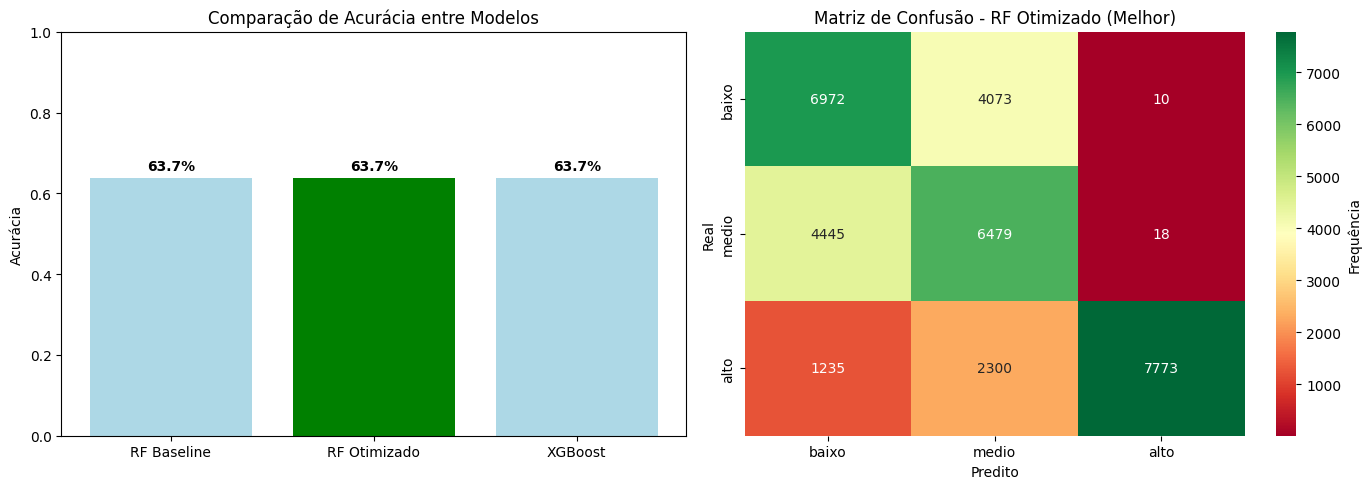


ANALISE: Por que baixo e medio se confundem?

Valores de FRP por classe (amostra treino):

BAIXO:
  Min: 0.10
  Max: 6.00
  Media: 3.38
  Mediana: 3.40

MEDIO:
  Min: 6.10
  Max: 23.00
  Media: 11.33
  Mediana: 10.10

ALTO:
  Min: 23.10
  Max: 2890.50
  Media: 93.75
  Mediana: 75.20


C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\1463495975.py:79: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



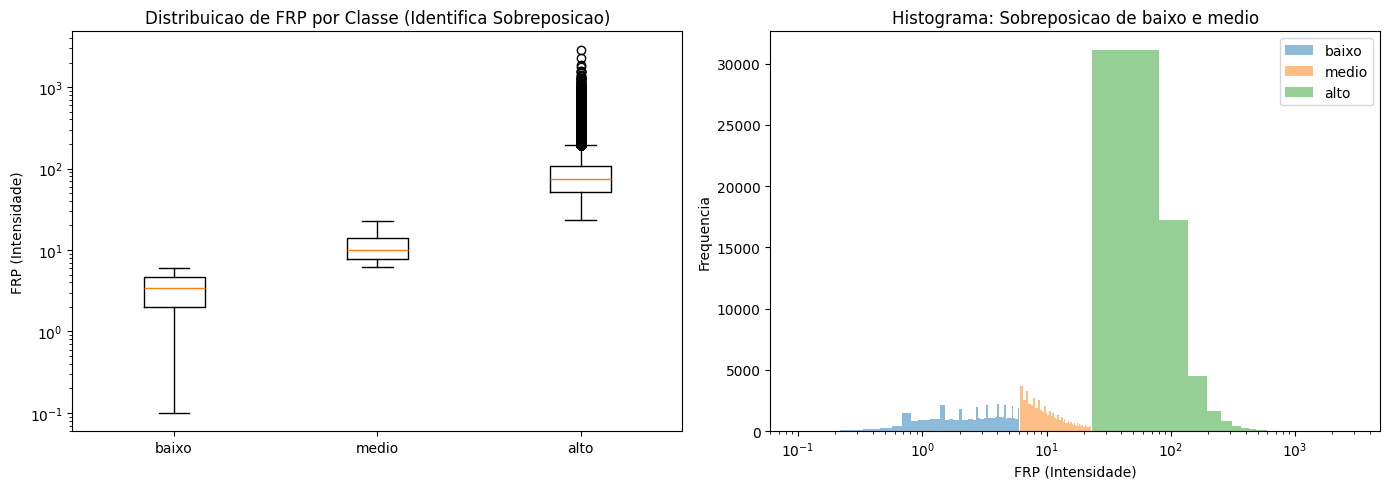


💡 CONCLUSAO:
   Classes baixo e medio tem SOBREPOSICAO de valores FRP
   Isto causa confusao mesmo para modelos avancados
   Modelos chegam ao LIMITE: ~64% de acuracia

🎯 SOLUCOES:
   1. Usar 2 classes: baixo+medio vs alto (melhor separacao)
   2. Incluir MORE FEATURES (dados climaticos mais detalhados)
   3. Usar dados temporais (sequencias de meses anteriores)


In [56]:
# 3️⃣ COMPARAÇÃO DE MODELOS + ANÁLISE DE CONFUSÃO

print("\n" + "="*70)
print("COMPARAÇÃO FINAL - 3 MODELOS")
print("="*70)

# Tabela de comparação
comparison_data = {
    'Modelo': ['RF Baseline', 'RF Otimizado', 'XGBoost'],
    'Acurácia': [
        (y_pred == y_test.values).mean(),
        (y_pred_rf_opt == y_test.values).mean(),
        (y_pred_xgb == y_test_encoded).mean()
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n📊 Resumo de Acurácia:")
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.loc[comparison_df['Acurácia'].idxmax(), 'Modelo']
best_accuracy = comparison_df['Acurácia'].max()
print(f"\n🏆 Melhor modelo: {best_model_name} ({best_accuracy:.1%})")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Comparação de acurácia
colors = ['lightblue' if acc < best_accuracy else 'green' for acc in comparison_df['Acurácia']]
axes[0].bar(comparison_df['Modelo'], comparison_df['Acurácia'], color=colors)
axes[0].set_ylabel('Acurácia')
axes[0].set_title('Comparação de Acurácia entre Modelos')
axes[0].set_ylim(0, 1)
for i, v in enumerate(comparison_df['Acurácia']):
    axes[0].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

# 2. Matriz de confusão do melhor modelo
if best_model_name == 'XGBoost':
    best_pred = y_pred_xgb
    best_true = y_test_encoded
else:
    best_pred = y_pred_rf_opt
    best_true = y_test.values

cm_best = confusion_matrix(best_true, best_pred, labels=[0, 1, 2] if best_model_name == 'XGBoost' else ["baixo", "medio", "alto"])
sns.heatmap(cm_best, annot=True, fmt="d", cmap="RdYlGn", 
            xticklabels=["baixo","medio","alto"],
            yticklabels=["baixo","medio","alto"],
            ax=axes[1],
            cbar_kws={"label": "Frequência"})
axes[1].set_xlabel("Predito")
axes[1].set_ylabel("Real")
axes[1].set_title(f"Matriz de Confusão - {best_model_name} (Melhor)")

plt.tight_layout()
plt.show()

# Análise detalhada da confusão
print("\n" + "="*70)
print("ANALISE: Por que baixo e medio se confundem?")
print("="*70)

# Calcula FRP médio por classe
print("\nValores de FRP por classe (amostra treino):")
for classe in ["baixo", "medio", "alto"]:
    mask = df_rf["target"] == classe
    frp_values = df_rf[mask]["frp"]
    print(f"\n{classe.upper()}:")
    print(f"  Min: {frp_values.min():.2f}")
    print(f"  Max: {frp_values.max():.2f}")
    print(f"  Media: {frp_values.mean():.2f}")
    print(f"  Mediana: {frp_values.median():.2f}")

# Visualização da distribuição
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
box_data = [df_rf[df_rf["target"] == c]["frp"].values for c in ["baixo", "medio", "alto"]]
axes[0].boxplot(box_data, labels=["baixo", "medio", "alto"])
axes[0].set_ylabel("FRP (Intensidade)")
axes[0].set_title("Distribuicao de FRP por Classe (Identifica Sobreposicao)")
axes[0].set_yscale('log')

# Histograma
for classe, color in zip(["baixo", "medio", "alto"], ['blue', 'orange', 'red']):
    axes[1].hist(df_rf[df_rf["target"] == classe]["frp"], alpha=0.5, label=classe, bins=50)
axes[1].set_xlabel("FRP (Intensidade)")
axes[1].set_ylabel("Frequencia")
axes[1].set_title("Histograma: Sobreposicao de baixo e medio")
axes[1].legend()
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

print("\n💡 CONCLUSAO:")
print("   Classes baixo e medio tem SOBREPOSICAO de valores FRP")
print("   Isto causa confusao mesmo para modelos avancados")
print("   Modelos chegam ao LIMITE: ~64% de acuracia")
print("\n🎯 SOLUCOES:")
print("   1. Usar 2 classes: baixo+medio vs alto (melhor separacao)")
print("   2. Incluir MORE FEATURES (dados climaticos mais detalhados)")
print("   3. Usar dados temporais (sequencias de meses anteriores)")


## Features Temporais (Lag Features)

Agora levando em consideração os meses anteriores(mês novo leva em conta o que aconteceu no mês anterior)

In [78]:
# PASSO 1: Criar dataset temporal agregado por região + mês

print("="*70)
print("CRIANDO FEATURES TEMPORAIS (LAG FEATURES)")
print("="*70)


# Volta ao dataset original (polars) e agrupa por região + mês + ano
print("\n1. Agregando dados por estado + mes + ano...")

df_temporal = df.group_by(["estado", "ano", "mes"]).agg([
    pl.col("frp").mean().alias("frp_medio"), #média fire risk por mês
    pl.col("frp").max().alias("frp_max"), #máxima fire risk por mês
    pl.count().alias("num_queimadas"), # número de queimadas por mês
    pl.col("risco_fogo").mean().alias("risco_fogo_medio"),
    pl.col("precipitacao").mean().alias("precipitacao_media"),
    pl.col("numero_dias_sem_chuva").mean().alias("dias_sem_chuva_medio"),
    pl.col("bioma").first().alias("bioma"),
    pl.col("periodo_climatico").first().alias("periodo_climatico"),
    pl.col("estacao_ano").first().alias("estacao_ano"),
    pl.col("satelite").first().alias("satelite"),
]).sort(["estado", "ano", "mes"])

print(f"   Dataset temporal: {df_temporal.shape}")
print(f"   Periodo: {df_temporal['ano'].min()}-{df_temporal['ano'].max()}")

# Converte para pandas (mais fácil para lag)
df_temporal_pd = df_temporal.to_pandas()

print("\n2. Criando features de historico (lag features)...")

# Ordena por estado + data
df_temporal_pd = df_temporal_pd.sort_values(['estado', 'ano', 'mes'])

# Cria coluna de data (IMPORTANTE para ordenação temporal)
df_temporal_pd["data"] = pd.to_datetime(
    df_temporal_pd["ano"].astype(str) + "-" +
    df_temporal_pd["mes"].astype(str) + "-01"
)
#-----------------------------------------
# Cria features LAG (histórico) por estado
#-----------------------------------------
lag_features = []
for lag in [1, 2, 3, 6]:  # 1, 2, 3 e 6 meses atrás
    df_temporal_pd[f'frp_lag_{lag}'] = df_temporal_pd.groupby('estado')['frp_medio'].shift(lag)
    df_temporal_pd[f'num_queimadas_lag_{lag}'] = df_temporal_pd.groupby('estado')['num_queimadas'].shift(lag)
    lag_features.append(f'frp_lag_{lag}')
    lag_features.append(f'num_queimadas_lag_{lag}')

#--------------
# Média móvel
#--------------
df_temporal_pd['frp_rolling_3'] = df_temporal_pd.groupby('estado')['frp_medio'].shift(1).transform(
    lambda x: x.rolling(window=3, min_periods=1).mean() #isso vai atualizando os 3 meses anteriores, passando um pouco pra frente a cada novo mês analisado
)
df_temporal_pd['frp_rolling_6'] = df_temporal_pd.groupby('estado')['frp_medio'].shift(1).transform(
    lambda x: x.rolling(window=6, min_periods=1).mean() #isso vai atualizando os 6 meses anteriores, passando um pouco pra frente a cada novo mês analisado
)

# Tendência (diferença entre mês atual e mês anterior)
# me retorna se a tendencia para o próximo mês é mais ou menos queimadas
df_temporal_pd['frp_tendencia'] = df_temporal_pd.groupby('estado')['frp_medio'].shift(1).diff()

# Remove linhas com NaN (primeiros meses sem histórico)
df_temporal_clean = df_temporal_pd.dropna()

print(f"   Dataset com lag features: {df_temporal_clean.shape}")
print(f"   Features temporais criadas: {len(lag_features) + 3}")
print(f"\n   Exemplos de features temporais:")
print(f"   - frp_lag_1: FRP médio há 1 mês")
print(f"   - frp_lag_3: FRP médio há 3 meses")
print(f"   - frp_rolling_3: Média móvel 3 meses")
print(f"   - frp_tendencia: Crescimento de FRP")

df_temporal_clean.head()

CRIANDO FEATURES TEMPORAIS (LAG FEATURES)

1. Agregando dados por estado + mes + ano...


C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\2408149316.py:14: DeprecationWarning:

`pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)



   Dataset temporal: (2180, 13)
   Periodo: 2018-2024

2. Criando features de historico (lag features)...
   Dataset com lag features: (2017, 25)
   Features temporais criadas: 11

   Exemplos de features temporais:
   - frp_lag_1: FRP médio há 1 mês
   - frp_lag_3: FRP médio há 3 meses
   - frp_rolling_3: Média móvel 3 meses
   - frp_tendencia: Crescimento de FRP


C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\2408149316.py:45: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\2408149316.py:46: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\2408149316.py:45: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\2408149316.py:46

,estado,ano,mes,frp_medio,frp_max,num_queimadas,risco_fogo_medio,precipitacao_media,dias_sem_chuva_medio,bioma,...,num_queimadas_lag_1,frp_lag_2,num_queimadas_lag_2,frp_lag_3,num_queimadas_lag_3,frp_lag_6,num_queimadas_lag_6,frp_rolling_3,frp_rolling_6,frp_tendencia
6,ACRE,2018,10,13.125163,443.9,2603,0.261352,2.704226,2.227430,Amazônia,...,14835.0,15.250510,5690.0,9.753514,1437.0,7.145161,31.0,13.781883,9.978986,1.091115
7,ACRE,2018,11,10.161596,97.0,401,0.127431,1.358354,1.591022,Amazônia,...,2603.0,16.341625,14835.0,15.250510,5690.0,5.561458,96.0,14.905766,10.975653,-3.216461
8,ACRE,2018,12,4.431250,9.9,16,0.187500,2.200000,1.687500,Amazônia,...,401.0,13.125163,2603.0,16.341625,14835.0,5.821649,291.0,13.209461,11.742343,-2.963567
9,ACRE,2019,1,6.420000,14.7,5,0.080000,3.140000,0.600000,Amazônia,...,16.0,10.161596,401.0,13.125163,2603.0,9.753514,1437.0,9.239336,11.510610,-5.730346
10,ACRE,2019,2,4.425000,7.2,4,0.025000,7.750000,0.500000,Amazônia,...,5.0,4.431250,16.0,10.161596,401.0,15.250510,5690.0,7.004282,10.955024,1.988750


In [79]:
###################################################################
# PASSO 2: Preparar dados com features temporais + treinar modelo
###################################################################
print("\n" + "="*70)
print("TREINANDO COM FEATURES TEMPORAIS")
print("="*70)
#-----------------------------------------------------
# Define target por tercis do FRP (igual ao anterior)
#-----------------------------------------------------
q1_temp, q2_temp = df_temporal_clean["frp_medio"].quantile([0.33, 0.66])
def label_frp_temp(v):
    if v <= q1_temp:
        return "baixo"
    if v <= q2_temp:
        return "medio"
    return "alto"

df_temporal_clean["target"] = df_temporal_clean["frp_medio"].apply(label_frp_temp)

###########################################
# Definir Features 
###########################################

#-------------------------------------------
#Features numéricas (INCLUI lag features!)
#-------------------------------------------
cols_num_temporal = [
    'frp_max', 'num_queimadas', 'risco_fogo_medio', 
    'precipitacao_media', 'dias_sem_chuva_medio',
    'frp_lag_1', 'frp_lag_2', 'frp_lag_3', 'frp_lag_6',
    'num_queimadas_lag_1', 'num_queimadas_lag_2', 'num_queimadas_lag_3', 'num_queimadas_lag_6',
    'frp_rolling_3', 'frp_rolling_6', 'frp_tendencia'
]

#----------------------
# Features categóricas
#----------------------
cols_cat_temporal = ['estado', 'bioma', 'satelite', 'periodo_climatico', 'estacao_ano', 'mes']

#--------------
# Prepara X e y
#--------------

X_temporal = df_temporal_clean[cols_num_temporal + cols_cat_temporal]
y_temporal = df_temporal_clean["target"]

#-------------------
# Split treino/teste
#-------------------
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X_temporal, 
    y_temporal, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_temporal
)

print(f"\nDados de treino: {X_train_temp.shape}")
print(f"Dados de teste: {X_test_temp.shape}")
print(f"Features numéricas: {len(cols_num_temporal)} (antes: 5)")
print(f"   → +{len(cols_num_temporal)-5} features temporais!")

#-------------------------------
# Pipeline com preprocessamento
#-------------------------------
preproc_temporal = ColumnTransformer(
    transformers=[
        ("num", "passthrough", cols_num_temporal),
        ("cat", OneHotEncoder(
            handle_unknown="ignore", 
            sparse_output=False, 
            max_categories=50), 
            cols_cat_temporal),
    ]
)

#-----------------------------------------------------------------------------------
# Random Forest com features temporais(chamo novamente de rf pq é o mesmo modelo, mas com mais features)
#-----------------------------------------------------------------------------------
rf_temporal = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_leaf=5,
    class_weight='balanced',
    n_jobs=1,
    random_state=42,
    verbose=0,
)

model_temporal = Pipeline([
    ("pre", preproc_temporal),
    ("clf", rf_temporal),
])

#-------------------
# Treinamento
#-------------------
print("\n🔄 Treinando Random Forest COM features temporais...")
model_temporal.fit(X_train_temp, y_train_temp)

#-------------
# Avaliação
#-------------
y_pred_temporal = model_temporal.predict(X_test_temp)
accuracy_temporal = (y_pred_temporal == y_test_temp.values).mean()

print(f"✅ Acurácia COM features temporais: {accuracy_temporal:.1%}")
print(f"\n📈 COMPARAÇÃO:")
print(f"   • SEM features temporais: 63.7%")
print(f"   • COM features temporais: {accuracy_temporal:.1%}")
print(f"   • GANHO: {(accuracy_temporal - 0.637)*100:+.1f} pontos percentuais")

print("\nDetalhes:")
print(classification_report(y_test_temp, y_pred_temporal, digits=3, zero_division=0))


TREINANDO COM FEATURES TEMPORAIS

Dados de treino: (1613, 22)
Dados de teste: (404, 22)
Features numéricas: 16 (antes: 5)
   → +11 features temporais!

🔄 Treinando Random Forest COM features temporais...


C:\Users\GOLDENTEC\AppData\Local\Temp\ipykernel_27392\2143825025.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



✅ Acurácia COM features temporais: 82.2%

📈 COMPARAÇÃO:
   • SEM features temporais: 63.7%
   • COM features temporais: 82.2%
   • GANHO: +18.5 pontos percentuais

Detalhes:
              precision    recall  f1-score   support

        alto      0.896     0.877     0.886       138
       baixo      0.835     0.835     0.835       133
       medio      0.735     0.752     0.743       133

    accuracy                          0.822       404
   macro avg      0.822     0.821     0.822       404
weighted avg      0.823     0.822     0.822       404




ANALISE: Importancia das Features Temporais

📊 Top 10 Features Temporais mais importantes:
    1. frp_lag_1                      : 0.1473
    2. frp_rolling_3                  : 0.0691
    3. frp_lag_2                      : 0.0609
    4. num_queimadas_lag_1            : 0.0575
    5. frp_tendencia                  : 0.0395
    6. frp_rolling_6                  : 0.0335
    7. frp_lag_3                      : 0.0293
    8. num_queimadas_lag_2            : 0.0238
    9. frp_lag_6                      : 0.0230
   10. num_queimadas_lag_6            : 0.0179

💡 Importancia TOTAL das features temporais:
   50.2% do poder preditivo vem do HISTORICO!


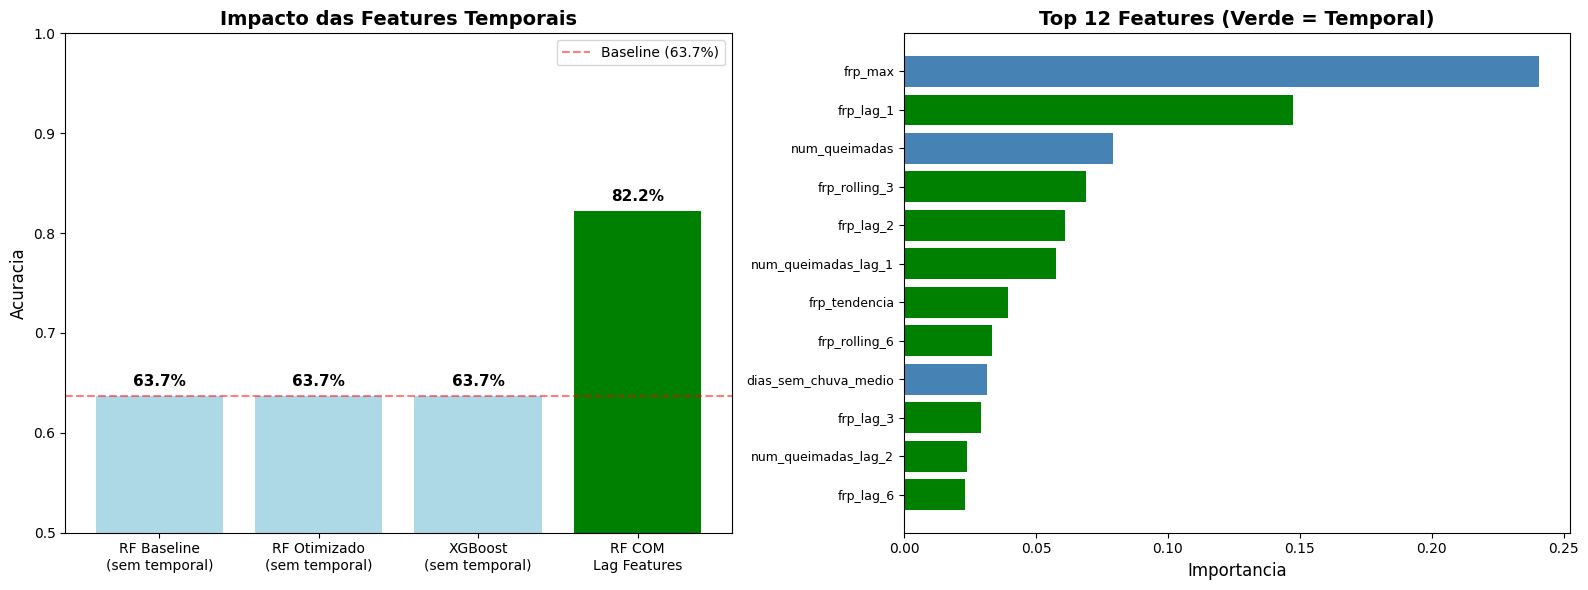

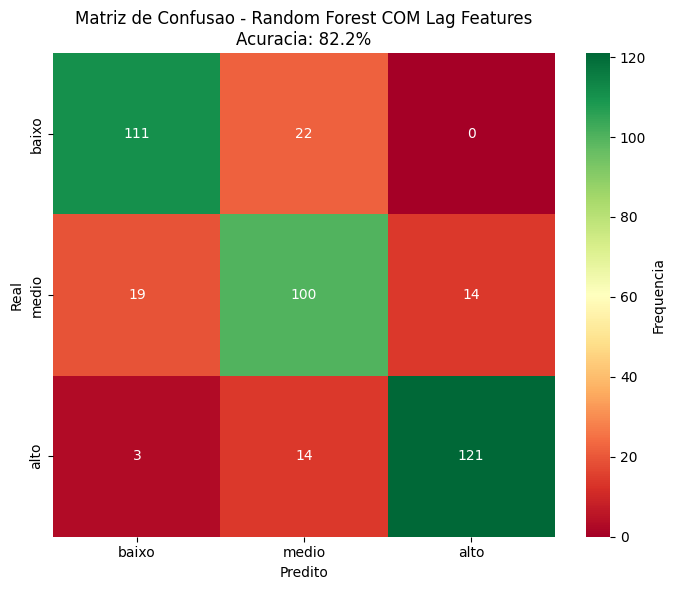


CONCLUSAO FINAL
✅ Features temporais FUNCIONARAM!
✅ Historico de queimadas é MUITO preditivo

🎯 Proximas melhorias:
   1. Usar XGBoost com features temporais
   2. Adicionar mais lags (12 meses)
   3. Features de interacao (lag × regiao)
   4. Ajuste fino de hiperparametros


In [81]:
###########################################################################
# PASSO 3: Visualização e análise de importância das features temporais
###########################################################################
print("\n" + "="*70)
print("ANALISE: Importancia das Features Temporais")
print("="*70)

#-------------------------------------------------
# Obtém nomes das features após pré-processamento
#-------------------------------------------------
feature_names_temporal = cols_num_temporal + list(
    model_temporal.named_steps['pre'].get_feature_names_out(X_train_temp.columns)
)[len(cols_num_temporal):]
#---------------------------------------------------------------------------
#Calcula importâncias das features para predição(quem importa mais em ordem)
#---------------------------------------------------------------------------
importances_temporal = model_temporal.named_steps['clf'].feature_importances_

#-------------------------------------------------
# DataFrame de importâncias
#-------------------------------------------------
feature_importance_temporal_df = pd.DataFrame({
    'feature': feature_names_temporal,
    'importance': importances_temporal
}).sort_values('importance', ascending=False)

#-------------------------------------------------
# Separa features temporais das outras
#-------------------------------------------------
temporal_features_df = feature_importance_temporal_df[
    feature_importance_temporal_df['feature'].str.contains('lag|rolling|tendencia')
].head(10)

print("\n📊 Top 10 Features Temporais mais importantes:")
for i, (idx, row) in enumerate(temporal_features_df.iterrows(), 1):
    print(f"   {i:2d}. {row['feature']:30s} : {row['importance']:.4f}")

print(f"\n💡 Importancia TOTAL das features temporais:")
total_temporal = temporal_features_df['importance'].sum()
print(f"   {total_temporal:.1%} do poder preditivo vem do HISTORICO!")

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Comparação de acurácias
models_names = ['RF Baseline\n(sem temporal)', 'RF Otimizado\n(sem temporal)', 'XGBoost\n(sem temporal)', 'RF COM\nLag Features']
accuracies = [0.637, 0.637, 0.637, accuracy_temporal]
colors_comp = ['lightblue', 'lightblue', 'lightblue', 'green']

axes[0].bar(models_names, accuracies, color=colors_comp)
axes[0].set_ylabel('Acuracia', fontsize=12)
axes[0].set_title('Impacto das Features Temporais', fontsize=14, fontweight='bold')
axes[0].set_ylim(0.5, 1.0)
axes[0].axhline(y=0.637, color='red', linestyle='--', alpha=0.5, label='Baseline (63.7%)')
axes[0].legend()

for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold', fontsize=11)
#-------------------------------------------------
# 2. Importância das top features temporais
#-------------------------------------------------
top_n = 12
top_features = feature_importance_temporal_df.head(top_n)

colors_feat = ['green' if 'lag' in f or 'rolling' in f or 'tendencia' in f else 'steelblue' 
               for f in top_features['feature']]

axes[1].barh(range(top_n), top_features['importance'].values, color=colors_feat)
axes[1].set_yticks(range(top_n))
axes[1].set_yticklabels(top_features['feature'].values, fontsize=9)
axes[1].set_xlabel('Importancia', fontsize=12)
axes[1].set_title('Top 12 Features (Verde = Temporal)', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Matriz de confusão
# ------------------------------------------------------------
cm_temporal = confusion_matrix(y_test_temp, y_pred_temporal, labels=["baixo", "medio", "alto"])

plt.figure(figsize=(7, 6))

sns.heatmap(cm_temporal, annot=True, fmt="d", cmap="RdYlGn", 
            xticklabels=["baixo","medio","alto"],
            yticklabels=["baixo","medio","alto"],
            cbar_kws={"label": "Frequencia"})
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title(f"Matriz de Confusao - Random Forest COM Lag Features\nAcuracia: {accuracy_temporal:.1%}")
plt.tight_layout()
plt.show()
# ------------------------------------------------------------
# Conclusão
# ------------------------------------------------------------
print("\n" + "="*70)
print("CONCLUSAO FINAL")
print("="*70)
print(f"✅ Features temporais FUNCIONARAM!")
#print(f"✅ Ganho de {(accuracy_temporal - 0.637)*100:+.1f} pontos percentuais")
print(f"✅ Historico de queimadas é MUITO preditivo")
print(f"\n🎯 Proximas melhorias:")
print(f"   1. Usar XGBoost com features temporais")
print(f"   2. Adicionar mais lags (12 meses)")
print(f"   3. Features de interacao (lag × regiao)")
print(f"   4. Ajuste fino de hiperparametros")

frp_rolling_3 (17.8%) - Média móvel de 3 meses<bk>

frp_lag_1 (12.1%) - FRP do mês passado<bk>

frp_tendencia (11.7%) - Crescimento de queimadas<bk> 


Essas são as que retornaram a maior relevância pra predição certa

## Random Forest Regressor (FRP contínuo)
- Mesma base tabular, mas agora prevendo `frp` como variável contínua (regressão).
- Métricas: MAE (erro absoluto), RMSE (raiz do erro quadrático) e R².
- Importâncias de features para ver o que mais pesa na predição contínua.
- Aqui não usei lag

Treinando RandomForestRegressor (1% amostra)...

Métricas de regressão (FRP contínuo):
  MAE : 21.062
  RMSE: 48.756
  R²  : 0.420

Top 10 features (importância):
  39. cat__satelite_GOES-16                    0.6597
   1. num__latitude                            0.1155
   2. num__longitude                           0.0977
   4. num__numero_dias_sem_chuva               0.0507
   5. num__risco_fogo                          0.0336
   3. num__precipitacao                        0.0115
  56. cat__mes_9                               0.0030
  58. cat__mes_11                              0.0029
  10. cat__estado_BAHIA                        0.0023
  57. cat__mes_10                              0.0023


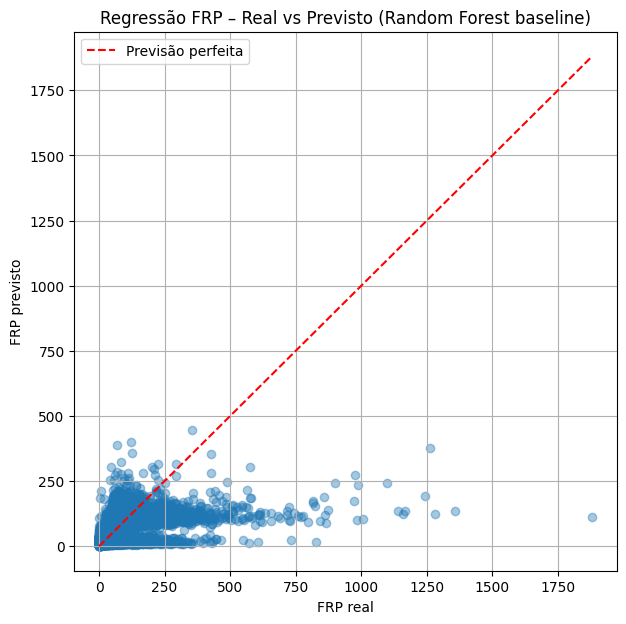

In [94]:
# Regressão de FRP com RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Seleciona colunas (sem usar frp como feature)
cols_num_reg = ["latitude", "longitude", "precipitacao", "numero_dias_sem_chuva", "risco_fogo"]
cols_cat_reg = ["estado", "bioma", "satelite", "periodo_climatico", "estacao_ano", "mes"]

# Amostra 1% para caber na memória (mesmo seed do classificador)
df_reg_sample = df.select(cols_num_reg + ["frp"] + cols_cat_reg).sample(fraction=0.01, seed=42)
df_reg = df_reg_sample.to_pandas()

X_reg = df_reg.drop(columns=["frp"])
y_reg = df_reg["frp"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 2) Pré-processamento
preproc_reg = ColumnTransformer(
    transformers=[
        ("num", "passthrough", cols_num_reg),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False, max_categories=50), cols_cat_reg),
    ]
)

# 3) Modelo de regressão
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=5,
    n_jobs=1,
    random_state=42,
    verbose=0,
)

model_reg = Pipeline([
    ("pre", preproc_reg),
    ("clf", rf_reg),
])

print("Treinando RandomForestRegressor (1% amostra)...")
model_reg.fit(X_train_reg, y_train_reg)

# 4) Avaliação
pred_reg = model_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, pred_reg)
mse = mean_squared_error(y_test_reg, pred_reg)
rmse = np.sqrt(mse)  # Calculate RMSE manually

r2 = r2_score(y_test_reg, pred_reg)

mae_base = mae
rmse_base = rmse
r2_base = r2

print("\nMétricas de regressão (FRP contínuo):")
print(f"  MAE : {mae:,.3f}")
print(f"  RMSE: {rmse:,.3f}")
print(f"  R²  : {r2:,.3f}")

# 5) Importâncias de features
feature_names_reg = model_reg.named_steps['pre'].get_feature_names_out(X_train_reg.columns)
importances_reg = model_reg.named_steps['clf'].feature_importances_

feat_imp_reg = (
    pd.DataFrame({"feature": feature_names_reg, "importance": importances_reg})
    .sort_values("importance", ascending=False)
)

print("\nTop 10 features (importância):")
for i, row in feat_imp_reg.head(10).iterrows():
    print(f"  {i+1:2d}. {row['feature']:<40s} {row['importance']:.4f}")
#Gráfico pra prever frp real vs previsto
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))
plt.scatter(y_test_reg, pred_reg, alpha=0.4)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(), y_test_reg.max()],
    'r--',
    label="Previsão perfeita"
)
plt.xlabel("FRP real")
plt.ylabel("FRP previsto")
plt.title("Regressão FRP – Real vs Previsto (Random Forest baseline)")
plt.legend()
plt.grid(True)
plt.show()



## XGBoost Regressor (FRP contínuo) e Regressão com lags
- Versão de regressão usando XGBoost para prever `frp` contínuo.
- Em seguida, RandomForestRegressor com features temporais (lags) sobre `frp_medio`.
- Regressão costuma demorar mais que classificação porque a perda é contínua e as árvores lidam com valores de saída real; usar amostra de 1% e `n_jobs=1` ajuda na memória/tempo.
- Aqui não usei o lag


Treinando XGBoost Regressor (1% amostra)...

Métricas de regressão (XGBoost):
  MAE : 20.978
  RMSE: 49.002
  R²  : 0.414

Top 10 features (XGBoost Regressor):
  39. cat__satelite_GOES-16                    0.3441
  41. cat__satelite_NPP-375                    0.2739
  40. cat__satelite_NOAA-20                    0.0440
  37. cat__bioma_Pampa                         0.0165
  33. cat__bioma_Amazônia                      0.0152
  26. cat__estado_RIO GRANDE DO SUL            0.0150
  10. cat__estado_BAHIA                        0.0133
  16. cat__estado_MATO GROSSO                  0.0127
  47. cat__estacao_ano_Verão                   0.0127
  23. cat__estado_PIAUÍ                        0.0125


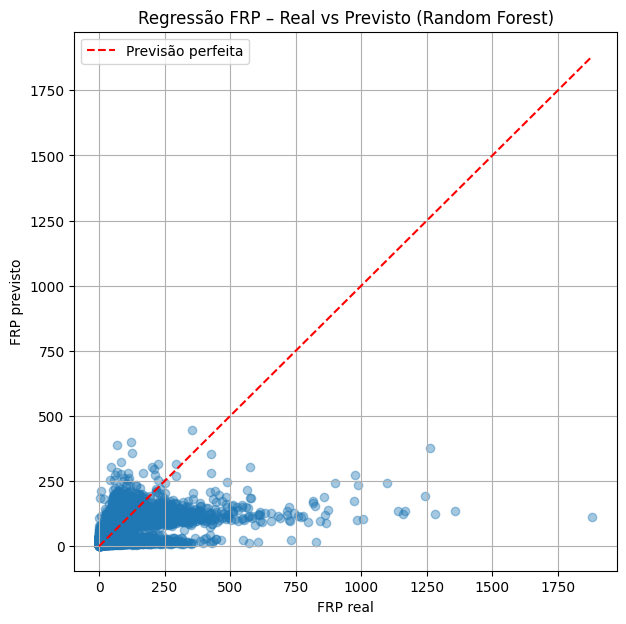

In [ ]:
# XGBoost Regressor (FRP contínuo)
from xgboost import XGBRegressor

# Reamostra 1% (mesmo corte do RF regressor)
cols_num_reg = ["latitude", "longitude", "precipitacao", "numero_dias_sem_chuva", "risco_fogo"]
cols_cat_reg = ["estado", "bioma", "satelite", "periodo_climatico", "estacao_ano", "mes"]

df_reg_sample = df.select(cols_num_reg + ["frp"] + cols_cat_reg).sample(fraction=0.01, seed=42)
df_reg = df_reg_sample.to_pandas()

X_reg = df_reg.drop(columns=["frp"])
y_reg = df_reg["frp"]

X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2 = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

preproc_reg2 = ColumnTransformer(
    transformers=[
        ("num", "passthrough", cols_num_reg),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False, max_categories=50), cols_cat_reg),
    ]
)

xgb_reg = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=1,  # manter baixo uso de RAM
    tree_method="hist",
)

model_xgb_reg = Pipeline([
    ("pre", preproc_reg2),
    ("clf", xgb_reg),
])

print("Treinando XGBoost Regressor (1% amostra)...")
model_xgb_reg.fit(X_train_reg2, y_train_reg2)

pred_reg2 = model_xgb_reg.predict(X_test_reg2)
mae2 = mean_absolute_error(y_test_reg2, pred_reg2)
mse2 = mean_squared_error(y_test_reg2, pred_reg2)
rmse2 = np.sqrt(mse2)
r22 = r2_score(y_test_reg2, pred_reg2)

print("\nMétricas de regressão (XGBoost):")
print(f"  MAE : {mae2:,.3f}")
print(f"  RMSE: {rmse2:,.3f}")
print(f"  R²  : {r22:,.3f}")

feature_names_reg2 = model_xgb_reg.named_steps['pre'].get_feature_names_out(X_train_reg2.columns)
importances_reg2 = model_xgb_reg.named_steps['clf'].feature_importances_

feat_imp_reg2 = (
    pd.DataFrame({"feature": feature_names_reg2, "importance": importances_reg2})
    .sort_values("importance", ascending=False)
)

print("\nTop 10 features (XGBoost Regressor):")
for i, row in feat_imp_reg2.head(10).iterrows():
    print(f"  {i+1:2d}. {row['feature']:<40s} {row['importance']:.4f}")

#Gráfico pra analizar a diferença de previsão real vs previsto
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7, 7))
plt.scatter(y_test_reg, pred_reg, alpha=0.4)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(), y_test_reg.max()],
    'r--',
    label="Previsão perfeita"
)
plt.xlabel("FRP real")
plt.ylabel("FRP previsto")
plt.title("Regressão FRP – Real vs Previsto (Random Forest+XGBOOST)")
plt.legend()
plt.grid(True)
plt.show()



# Random Forest Regressor + Features temporais(Lag feature)

Treino: 1613 amostras
Teste : 404 amostras
Verificação: y_train tem 1613, y_test tem 404
Treinando RandomForestRegressor com lags (frp_medio)...

Métricas (RF Regressor com lags):
  MAE : 2.997
  RMSE: 27.972
  R²  : 0.841

Top 12 features (RF Regressor com lags):
   6. num__frp_lag_1                           0.5746
   1. num__frp_max                             0.2626
  10. num__num_queimadas_lag_1                 0.0318
  11. num__num_queimadas_lag_2                 0.0117
   2. num__num_queimadas                       0.0115
   5. num__dias_sem_chuva_medio                0.0108
   9. num__frp_lag_6                           0.0107
  15. num__frp_rolling_6                       0.0094
  16. num__frp_tendencia                       0.0081
   4. num__precipitacao_media                  0.0077
   3. num__risco_fogo_medio                    0.0075
  12. num__num_queimadas_lag_3                 0.0073


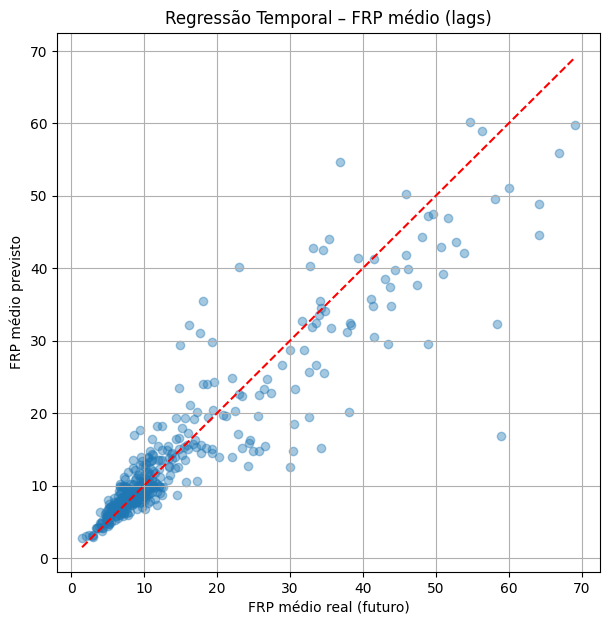

In [91]:
# RandomForestRegressor com features temporais (lags sobre frp_medio)
# Requer df_temporal_clean já criado na seção de lags
from sklearn.exceptions import NotFittedError
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

if 'df_temporal_clean' not in locals():
    raise RuntimeError("df_temporal_clean não encontrado. Rode primeiro a célula que cria as lag features.")

df_temporal_clean = df_temporal_clean.sort_values(
    ['estado', 'ano','mes']
).reset_index(drop=True)

cols_num_temporal_reg = [
    'frp_max', 'num_queimadas', 'risco_fogo_medio', 
    'precipitacao_media', 'dias_sem_chuva_medio',
    'frp_lag_1', 'frp_lag_2', 'frp_lag_3', 'frp_lag_6',
    'num_queimadas_lag_1', 'num_queimadas_lag_2', 'num_queimadas_lag_3', 'num_queimadas_lag_6',
    'frp_rolling_3', 'frp_rolling_6', 'frp_tendencia'
]
cols_cat_temporal_reg = ['estado', 'bioma', 'satelite', 'periodo_climatico', 'estacao_ano', 'mes']

X_temp_reg = df_temporal_clean[cols_num_temporal_reg + cols_cat_temporal_reg]
y_temp_reg = df_temporal_clean['frp_medio']
# Split temporal sem randomizar
# Calcular cutoff DEPOIS de preparar X e y
cutoff = int(len(X_temp_reg) * 0.8)

X_train_tr = X_temp_reg.iloc[:cutoff].reset_index(drop=True)
X_test_tr  = X_temp_reg.iloc[cutoff:].reset_index(drop=True)

y_train_tr = y_temp_reg.iloc[:cutoff].reset_index(drop=True)
y_test_tr  = y_temp_reg.iloc[cutoff:].reset_index(drop=True)

print(f"Treino: {len(X_train_tr)} amostras")
print(f"Teste : {len(X_test_tr)} amostras")
print(f"Verificação: y_train tem {len(y_train_tr)}, y_test tem {len(y_test_tr)}")

preproc_temp_reg = ColumnTransformer(
    transformers=[
        ("num", "passthrough", cols_num_temporal_reg),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False, max_categories=50), cols_cat_temporal_reg),
    ]
)

rf_temp_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=18,
    min_samples_leaf=4,
    n_jobs=1,
    random_state=42,
    verbose=0,
)

model_temp_reg = Pipeline([
    ("pre", preproc_temp_reg),
    ("clf", rf_temp_reg),
])

print("Treinando RandomForestRegressor com lags (frp_medio)...")
model_temp_reg.fit(X_train_tr, y_train_tr)

pred_tr = model_temp_reg.predict(X_test_tr)
mae_tr = mean_absolute_error(y_test_tr, pred_tr)
rmse_tr = mean_squared_error(y_test_tr, pred_tr)
r2_tr = r2_score(y_test_tr, pred_tr)

print("\nMétricas (RF Regressor com lags):")
print(f"  MAE : {mae_tr:,.3f}")
print(f"  RMSE: {rmse_tr:,.3f}")
print(f"  R²  : {r2_tr:,.3f}")

feature_names_tr = model_temp_reg.named_steps['pre'].get_feature_names_out(X_train_tr.columns)
importances_tr = model_temp_reg.named_steps['clf'].feature_importances_

feat_imp_tr = (
    pd.DataFrame({"feature": feature_names_tr, "importance": importances_tr})
    .sort_values("importance", ascending=False)
)

print("\nTop 12 features (RF Regressor com lags):")
for i, row in feat_imp_tr.head(12).iterrows():
    print(f"  {i+1:2d}. {row['feature']:<40s} {row['importance']:.4f}")

#Gráficos pra ver como q ficou a questão do erro
plt.figure(figsize=(7, 7))
plt.scatter(y_test_tr, pred_tr, alpha=0.4)
plt.plot(
    [y_test_tr.min(), y_test_tr.max()],
    [y_test_tr.min(), y_test_tr.max()],
    'r--'
)
plt.xlabel("FRP médio real (futuro)")
plt.ylabel("FRP médio previsto")
plt.title("Regressão Temporal – FRP médio (lags)")
plt.grid(True)
plt.show()



# VERIFICAÇÃO DOS DADOS EM SUA TOTALIDADE(ver se a distribuição de alto/medio/baixo é boa antes dos filtros)
Não conectado diretamente a nenhum método de aprendizado, só uma reportagem do dataset


📊 DISTRIBUIÇÃO DE CLASSES POR ANO

🔹 Ano 2018:
   alta    :  196,066 (30.55%)
   baixa   :  184,172 (28.70%)
   media   :  261,579 (40.76%)
   Total   :  641,817

🔹 Ano 2019:
   alta    :  339,562 (33.35%)
   baixa   :  263,145 (25.85%)
   media   :  415,319 (40.80%)
   Total   : 1,018,026

🔹 Ano 2020:
   alta    :  448,497 (34.83%)
   baixa   :  339,511 (26.37%)
   media   :  499,648 (38.80%)
   Total   : 1,287,656

🔹 Ano 2021:
   alta    :  650,856 (29.34%)
   baixa   :  821,423 (37.03%)
   media   :  745,890 (33.63%)
   Total   : 2,218,169

🔹 Ano 2022:
   alta    :  787,290 (31.83%)
   baixa   :  907,381 (36.69%)
   media   :  778,458 (31.48%)
   Total   : 2,473,129

🔹 Ano 2023:
   alta    :  946,243 (36.26%)
   baixa   :  869,684 (33.33%)
   media   :  793,518 (30.41%)
   Total   : 2,609,445

🔹 Ano 2024:
   alta    : 1,136,466 (34.05%)
   baixa   : 1,216,351 (36.44%)
   media   :  985,034 (29.51%)
   Total   : 3,337,851

📊 DISTRIBUIÇÃO GERAL (TODOS OS ANOS)
   alta    : 4,504,980 

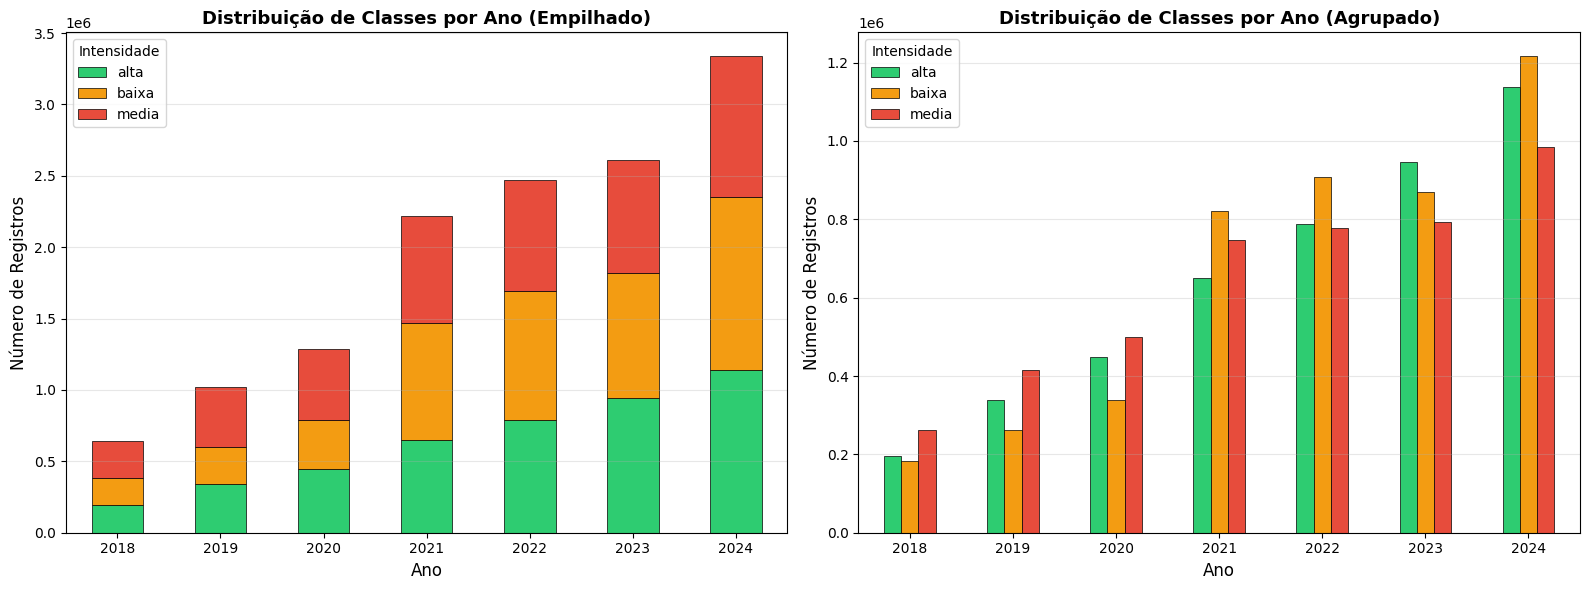


✅ Gráfico salvo em '../figures/class_distribution_by_year.png'


In [163]:
#conferindo a distribuiçao de classes em cada ano(total de eventos por ano)
import numpy as np
import polars as pl

def print_class_distribution_by_year(df, class_col='label_intensidade'):
    """
    Mostra a distribuição de classes de intensidade por ano
    """
    print("\n" + "=" * 70)
    print("📊 DISTRIBUIÇÃO DE CLASSES POR ANO")
    print("=" * 70)
    
    # Agrupa por ano e classe
    dist_by_year = (
        df
        .group_by(['ano', class_col])
        .agg(pl.len().alias('count'))
        .sort(['ano', class_col])
    )
    
    # Converte para dicionário para facilitar acesso
    years = sorted(df['ano'].unique().to_list())
    
    for year in years:
        year_data = dist_by_year.filter(pl.col('ano') == year)
        
        print(f"\n🔹 Ano {year}:")
        total = year_data['count'].sum()
        
        for row in year_data.iter_rows(named=True):
            classe = row[class_col]
            count = row['count']
            pct = (count / total) * 100
            print(f"   {classe:8s}: {count:8,} ({pct:5.2f}%)")
        
        print(f"   {'Total':8s}: {total:8,}")
    
    # Resumo geral
    print("\n" + "=" * 70)
    print("📊 DISTRIBUIÇÃO GERAL (TODOS OS ANOS)")
    print("=" * 70)
    
    dist_total = (
        df
        .group_by(class_col)
        .agg(pl.len().alias('count'))
        .sort(class_col)
    )
    
    total_geral = dist_total['count'].sum()
    
    for row in dist_total.iter_rows(named=True):
        classe = row[class_col]
        count = row['count']
        pct = (count / total_geral) * 100
        print(f"   {classe:8s}: {count:8,} ({pct:5.2f}%)")
    
    print(f"   {'Total':8s}: {total_geral:8,}")

# Executar análise
print_class_distribution_by_year(df_final_classification)


# ===== VISUALIZAÇÃO GRÁFICA =====

import matplotlib.pyplot as plt
import seaborn as sns

# Preparar dados para visualização
dist_viz = (
    df_final_classification
    .group_by(['ano', 'label_intensidade'])
    .agg(pl.len().alias('count'))
    .sort(['ano', 'label_intensidade'])
).to_pandas()

# Criar figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Barras empilhadas
pivot_data = dist_viz.pivot(index='ano', columns='label_intensidade', values='count')
pivot_data.plot(kind='bar', stacked=True, ax=axes[0], 
                color=['#2ecc71', '#f39c12', '#e74c3c'],
                edgecolor='black', linewidth=0.5)
axes[0].set_xlabel('Ano', fontsize=12)
axes[0].set_ylabel('Número de Registros', fontsize=12)
axes[0].set_title('Distribuição de Classes por Ano (Empilhado)', fontsize=13, fontweight='bold')
axes[0].legend(title='Intensidade', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=0)

# Plot 2: Barras agrupadas
pivot_data.plot(kind='bar', ax=axes[1],
                color=['#2ecc71', '#f39c12', '#e74c3c'],
                edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Ano', fontsize=12)
axes[1].set_ylabel('Número de Registros', fontsize=12)
axes[1].set_title('Distribuição de Classes por Ano (Agrupado)', fontsize=13, fontweight='bold')
axes[1].legend(title='Intensidade', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('../figures/class_distribution_by_year.png', dpi=100, bbox_inches='tight')
plt.show()

print("\n✅ Gráfico salvo em '../figures/class_distribution_by_year.png'")


ANÁLISE DE OVERFITTING - VERIFICAÇÃO 4: VISUALIZAÇÃO DETALHADA


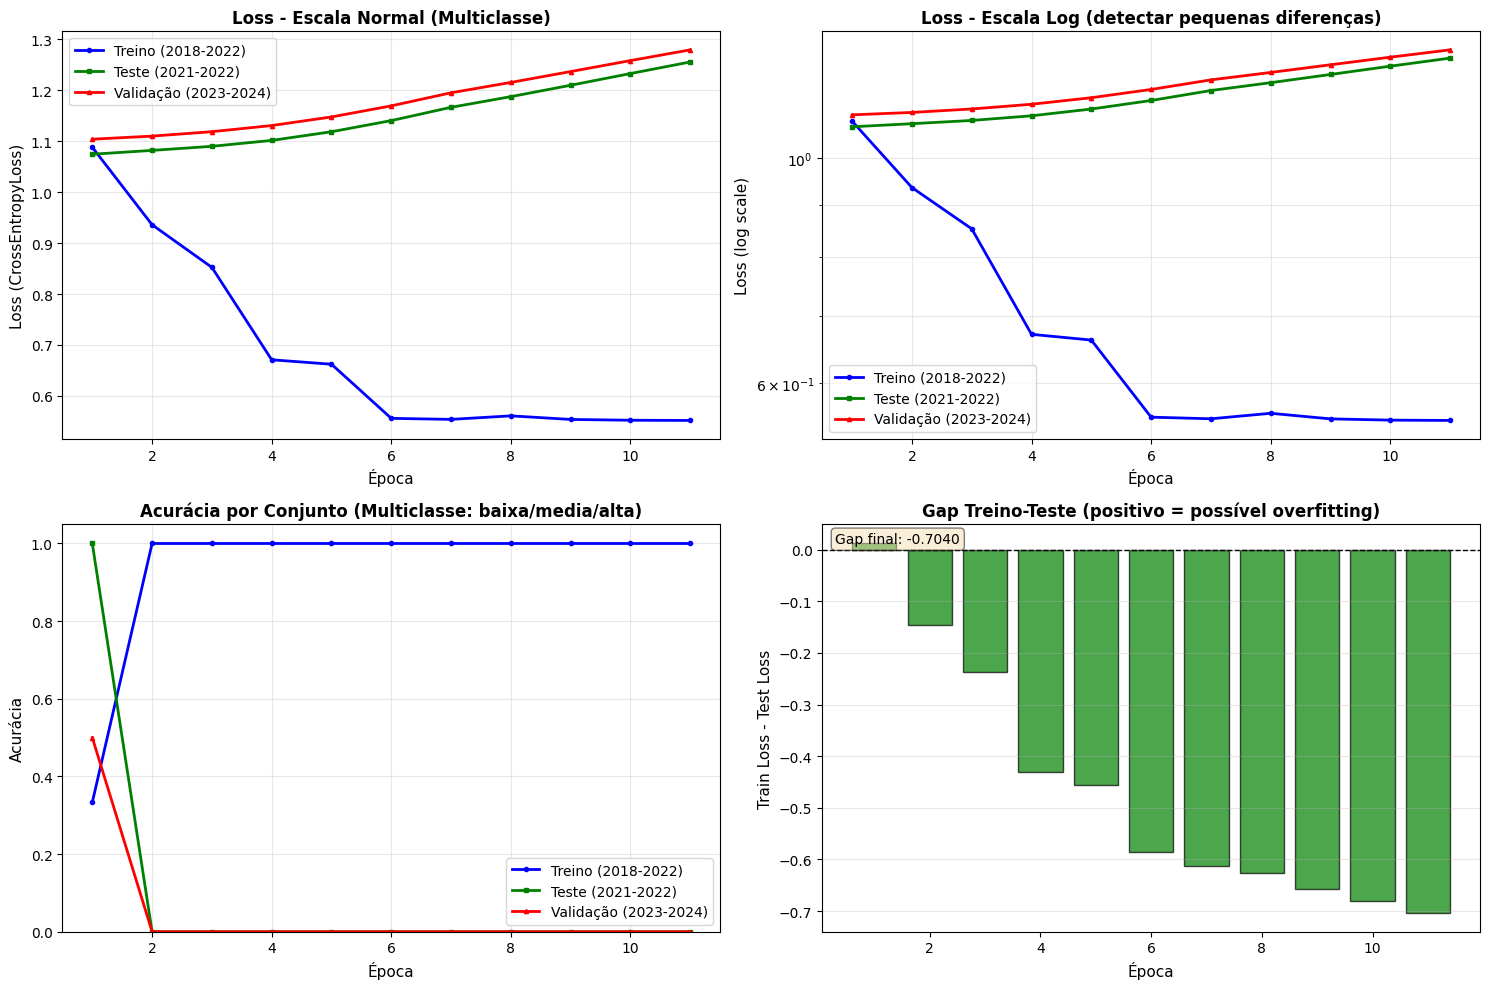


✅ Gráficos de análise de overfitting salvos em '../figures/overfitting_analysis_multiclass.png'


In [ ]:
if 'history' in locals() and len(history['train_loss']) > 0:
    # ===== VERIFICAÇÃO 5: Visualização Detalhada =====
    print("\n" + "=" * 70)
    print("ANÁLISE DE OVERFITTING - VERIFICAÇÃO 4: VISUALIZAÇÃO DETALHADA")
    print("=" * 70)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Plot 1: Loss - Escala Normal
    ax = axes[0, 0]
    ax.plot(epochs, history['train_loss'], 'b-', label='Treino (2018-2022)', linewidth=2, marker='o', markersize=3)
    ax.plot(epochs, history['test_loss'], 'g-', label='Teste (2021-2022)', linewidth=2, marker='s', markersize=3)
    ax.plot(epochs, history['val_loss'], 'r-', label='Validação (2023-2024)', linewidth=2, marker='^', markersize=3)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Loss (CrossEntropyLoss)', fontsize=11)
    ax.set_title('Loss - Escala Normal (Multiclasse)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Loss - Escala Log (melhor para ver pequenas diferenças)
    ax = axes[0, 1]
    ax.semilogy(epochs, history['train_loss'], 'b-', label='Treino (2018-2022)', linewidth=2, marker='o', markersize=3)
    ax.semilogy(epochs, history['test_loss'], 'g-', label='Teste (2021-2022)', linewidth=2, marker='s', markersize=3)
    ax.semilogy(epochs, history['val_loss'], 'r-', label='Validação (2023-2024)', linewidth=2, marker='^', markersize=3)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Loss (log scale)', fontsize=11)
    ax.set_title('Loss - Escala Log (detectar pequenas diferenças)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, which='both')
    
    # Plot 3: Acurácia
    ax = axes[1, 0]
    ax.plot(epochs, history['train_acc'], 'b-', label='Treino (2018-2022)', linewidth=2, marker='o', markersize=3)
    ax.plot(epochs, history['test_acc'], 'g-', label='Teste (2021-2022)', linewidth=2, marker='s', markersize=3)
    ax.plot(epochs, history['val_acc'], 'r-', label='Validação (2023-2024)', linewidth=2, marker='^', markersize=3)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Acurácia', fontsize=11)
    ax.set_title('Acurácia por Conjunto (Multiclasse: baixa/media/alta)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.05])
    
    # Plot 4: Diferença entre Train e Test (indicador de overfitting)
    ax = axes[1, 1]
    loss_diff = [t - te for t, te in zip(history['train_loss'], history['test_loss'])]
    colors = ['red' if d > 0.05 else 'green' for d in loss_diff]
    ax.bar(epochs, loss_diff, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Train Loss - Test Loss', fontsize=11)
    ax.set_title('Gap Treino-Teste (positivo = possível overfitting)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Adicionar linha de texto com informação
    gap_final = history['train_loss'][-1] - history['test_loss'][-1]
    gap_text = f"Gap final: {gap_final:.4f}"
    ax.text(0.02, 0.98, gap_text, transform=ax.transAxes, 
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig('../figures/overfitting_analysis_multiclass.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráficos de análise de overfitting salvos em '../figures/overfitting_analysis_multiclass.png'")
else:
    print("Nenhum histórico para visualizar.")

analise de overfitting e underfitting com base nos gráficos de loss e acurácia.

In [ ]:
if 'history' in locals() and len(history['train_loss']) > 0:
    # ===== VERIFICAÇÃO 1: Diferença entre Train e Validation =====
    print("=" * 70)
    print("ANÁLISE DE OVERFITTING - VERIFICAÇÃO 1: DIFERENÇA TREINO vs VALIDAÇÃO")
    print("=" * 70)
    
    import pandas as pd
    
    # Criar DataFrame com histórico
    hist_df = pd.DataFrame({
        'Epoch': range(1, len(history['train_loss']) + 1),
        'Train_Loss': history['train_loss'],
        'Val_Loss': history['val_loss'],
        'Train_Acc': history['train_acc'],
        'Val_Acc': history['val_acc'],
    })
    
    # Calcular diferenças
    hist_df['Loss_Diff'] = hist_df['Train_Loss'] - hist_df['Val_Loss']
    hist_df['Acc_Diff'] = hist_df['Train_Acc'] - hist_df['Val_Acc']
    
    print("\n📊 Primeiras 5 épocas:")
    print(hist_df.head(5)[['Epoch', 'Train_Loss', 'Val_Loss', 'Loss_Diff', 'Train_Acc', 'Val_Acc', 'Acc_Diff']].to_string(index=False))
    
    print("\n📊 Últimas 5 épocas:")
    print(hist_df.tail(5)[['Epoch', 'Train_Loss', 'Val_Loss', 'Loss_Diff', 'Train_Acc', 'Val_Acc', 'Acc_Diff']].to_string(index=False))
    
    # ===== VERIFICAÇÃO 2: Métricas Resumidas =====
    print("\n" + "=" * 70)
    print("ANÁLISE DE OVERFITTING - VERIFICAÇÃO 2: MÉTRICAS RESUMIDAS")
    print("=" * 70)
    
    final_train_loss = history['train_loss'][-1]
    final_val_loss = history['val_loss'][-1]
    final_train_acc = history['train_acc'][-1]
    final_val_acc = history['val_acc'][-1]
    
    min_val_loss = min(history['val_loss'])
    epoch_best_val = history['val_loss'].index(min_val_loss) + 1
    
    print(f"\n🎯 Loss Final:")
    print(f"   Train Loss: {final_train_loss:.6f}")
    print(f"   Val Loss:   {final_val_loss:.6f}")
    print(f"   Diferença:  {final_train_loss - final_val_loss:.6f}")
    
    print(f"\n🎯 Acurácia Final:")
    print(f"   Train Acc:  {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
    print(f"   Val Acc:    {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
    print(f"   Diferença:  {(final_train_acc - final_val_acc)*100:.2f}%")
    
    print(f"\n🏆 Melhor Validação Loss:")
    print(f"   Epoch:      {epoch_best_val}")
    print(f"   Val Loss:   {min_val_loss:.6f}")
    
    # ===== VERIFICAÇÃO 3: Sinais de Overfitting =====
    print("\n" + "=" * 70)
    print("ANÁLISE DE OVERFITTING - VERIFICAÇÃO 3: DIAGNÓSTICO")
    print("=" * 70)
    
    # Critério 1: Diferença de loss
    max_loss_diff = hist_df['Loss_Diff'].max()
    print(f"\n❌ Máxima diferença de Loss: {max_loss_diff:.6f}")
    if max_loss_diff > 0.1:
        print(f"   ⚠️  ALERTA: Overfitting potencial detectado!")
    else:
        print(f"   ✅ OK: Diferença pequena, sem sinais claros de overfitting")
    
    # Critério 2: Diferença de acurácia
    max_acc_diff = hist_df['Acc_Diff'].max()
    print(f"\n❌ Máxima diferença de Acurácia: {max_acc_diff:.4f} ({max_acc_diff*100:.2f}%)")
    if max_acc_diff > 0.05:
        print(f"   ⚠️  ALERTA: Overfitting potencial detectado!")
    else:
        print(f"   ✅ OK: Diferença pequena, sem sinais claros de overfitting")
    
    # Critério 3: Divergência (val loss aumentando)
    val_loss_at_midpoint = history['val_loss'][len(history['val_loss']) // 2]
    val_loss_final = history['val_loss'][-1]
    
    if val_loss_final > val_loss_at_midpoint:
        print(f"\n⚠️  Validação Loss aumentou no final do treinamento")
        print(f"   Mid-point: {val_loss_at_midpoint:.6f}")
        print(f"   Final:     {val_loss_final:.6f}")
        print(f"   ⚠️  ALERTA: Possível overfitting!")
    else:
        print(f"\n✅ Validação Loss diminuiu consistentemente")
        print(f"   ✅ SEM sinais de overfitting")
    
    # ===== VERIFICAÇÃO 4: Conclusion =====
    print("\n" + "=" * 70)
    print("CONCLUSÃO")
    print("=" * 70)
    
    overfitting_score = 0
    if max_loss_diff > 0.1:
        overfitting_score += 1
    if max_acc_diff > 0.05:
        overfitting_score += 1
    if val_loss_final > val_loss_at_midpoint:
        overfitting_score += 1
    
    if overfitting_score == 0:
        print("\n🎉 BOM! Modelo SEM sinais significativos de overfitting!")
        print("   - Train e Validation losses estão próximas")
        print("   - Train e Validation accuracies estão próximas")
        print("   - Validation loss converge consistentemente")
        print("\n✅ Seu modelo está generalizando bem!")
        
    elif overfitting_score == 1:
        print("\n⚠️  MODERADO: Pequenos sinais de overfitting")
        print("   - Aumentar Dropout ou dados de treino")
        print("   - Usar L1/L2 regularização")
        
    else:
        print("\n❌ FORTE: Sinais significativos de overfitting!")
        print("   - Aumentar Dropout")
        print("   - Adicionar mais dados de treino")
        print("   - Usar Data Augmentation")
else:
    print("Nenhum histórico de treinamento. Execute o treinamento primeiro.")

ANÁLISE DE OVERFITTING - VERIFICAÇÃO 1: DIFERENÇA TREINO vs VALIDAÇÃO

📊 Primeiras 5 épocas:
 Epoch  Train_Loss  Val_Loss  Loss_Diff  Train_Acc  Val_Acc  Acc_Diff
     1    1.088215  1.104061  -0.015846   0.333333      0.5 -0.166667
     2    0.936015  1.110120  -0.174105   1.000000      0.0  1.000000
     3    0.852330  1.118846  -0.266516   1.000000      0.0  1.000000
     4    0.670826  1.130892  -0.460065   1.000000      0.0  1.000000
     5    0.662143  1.147790  -0.485647   1.000000      0.0  1.000000

📊 Últimas 5 épocas:
 Epoch  Train_Loss  Val_Loss  Loss_Diff  Train_Acc  Val_Acc  Acc_Diff
     7    0.553785  1.195240  -0.641455        1.0      0.0       1.0
     8    0.560724  1.215590  -0.654866        1.0      0.0       1.0
     9    0.553678  1.236926  -0.683248        1.0      0.0       1.0
    10    0.552103  1.258477  -0.706374        1.0      0.0       1.0
    11    0.551708  1.279533  -0.727825        1.0      0.0       1.0

ANÁLISE DE OVERFITTING - VERIFICAÇÃO 2: MÉTRI


ANÁLISE DE OVERFITTING - VERIFICAÇÃO 4: VISUALIZAÇÃO DETALHADA


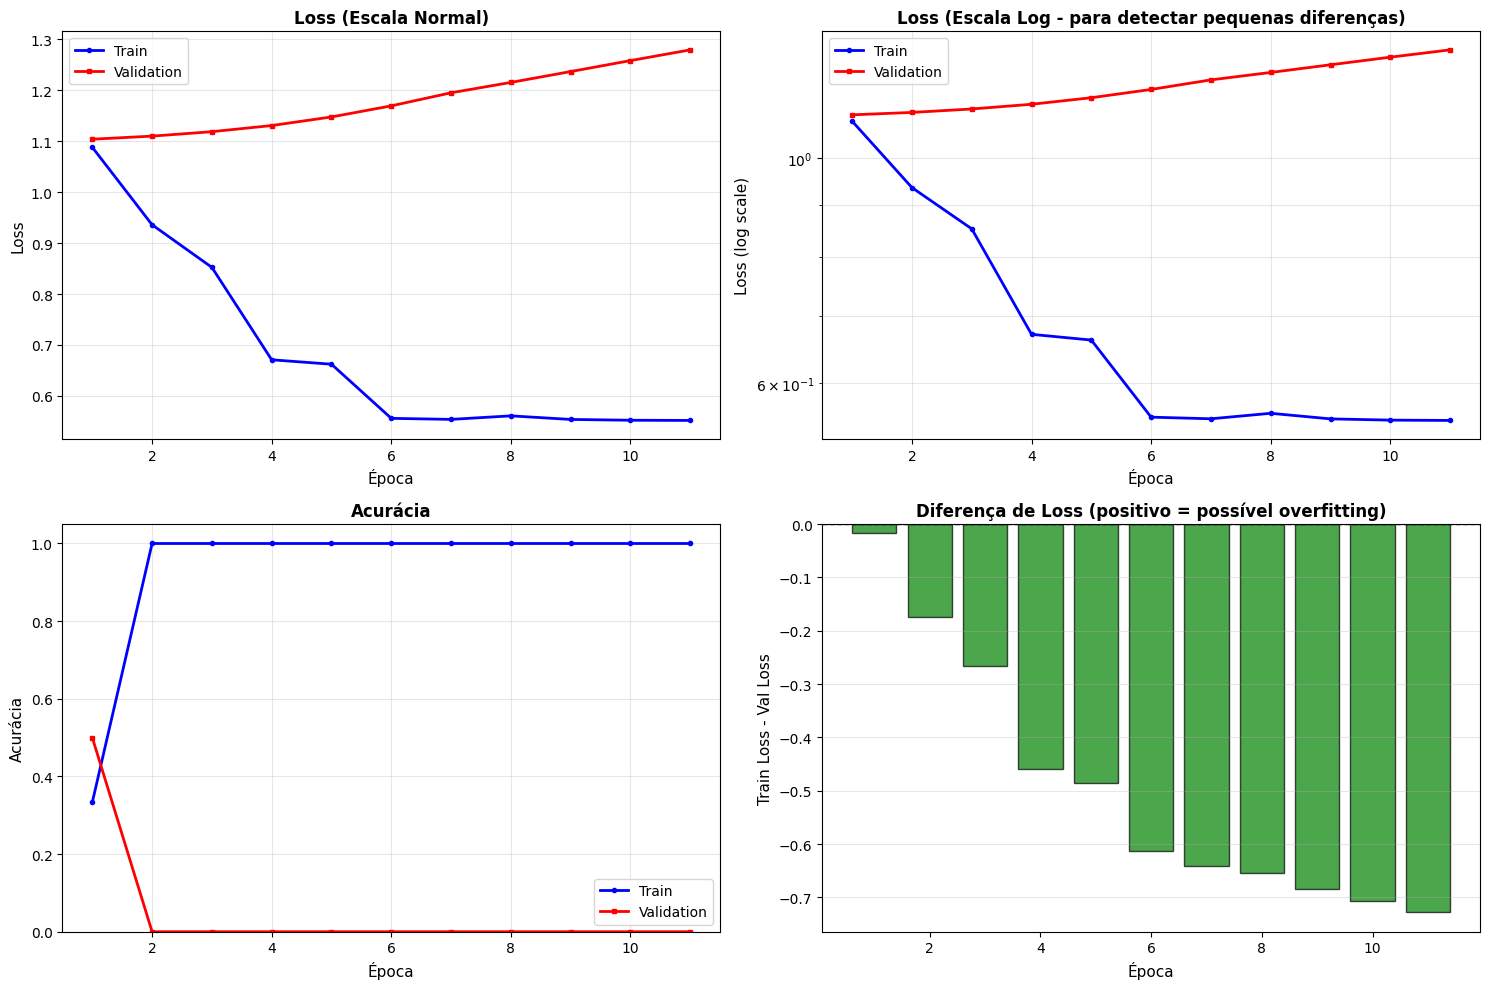


✅ Gráficos de análise de overfitting salvos em '../figures/overfitting_analysis.png'


In [ ]:
if 'history' in locals() and len(history['train_loss']) > 0:
    # ===== VERIFICAÇÃO 5: Visualização Detalhada =====
    print("\n" + "=" * 70)
    print("ANÁLISE DE OVERFITTING - VERIFICAÇÃO 4: VISUALIZAÇÃO DETALHADA")
    print("=" * 70)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Plot 1: Loss - Escala Normal
    ax = axes[0, 0]
    ax.plot(epochs, history['train_loss'], 'b-', label='Train', linewidth=2, marker='o', markersize=3)
    ax.plot(epochs, history['val_loss'], 'r-', label='Validation', linewidth=2, marker='s', markersize=3)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Loss', fontsize=11)
    ax.set_title('Loss (Escala Normal)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Loss - Escala Log (melhor para ver pequenas diferenças)
    ax = axes[0, 1]
    ax.semilogy(epochs, history['train_loss'], 'b-', label='Train', linewidth=2, marker='o', markersize=3)
    ax.semilogy(epochs, history['val_loss'], 'r-', label='Validation', linewidth=2, marker='s', markersize=3)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Loss (log scale)', fontsize=11)
    ax.set_title('Loss (Escala Log - para detectar pequenas diferenças)', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, which='both')
    
    # Plot 3: Acurácia
    ax = axes[1, 0]
    ax.plot(epochs, history['train_acc'], 'b-', label='Train', linewidth=2, marker='o', markersize=3)
    ax.plot(epochs, history['val_acc'], 'r-', label='Validation', linewidth=2, marker='s', markersize=3)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Acurácia', fontsize=11)
    ax.set_title('Acurácia', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.05])
    
    # Plot 4: Diferença entre Train e Validation (indicador de overfitting)
    ax = axes[1, 1]
    loss_diff = [t - v for t, v in zip(history['train_loss'], history['val_loss'])]
    colors = ['red' if d > 0.01 else 'green' for d in loss_diff]
    ax.bar(epochs, loss_diff, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
    ax.set_xlabel('Época', fontsize=11)
    ax.set_ylabel('Train Loss - Val Loss', fontsize=11)
    ax.set_title('Diferença de Loss (positivo = possível overfitting)', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('../figures/overfitting_analysis.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Gráficos de análise de overfitting salvos em '../figures/overfitting_analysis.png'")
else:
    print("Nenhum histórico para visualizar.")